# SECTION 01. AI 작업환경 만들기

## 1. 패키지 설치하기

In [1]:
# subprocess를 활용하기 위한 패키지 불러오기
import subprocess
import sys
# subprocess를 활용한 패키지 설치하기
subprocess.call([sys.executable,"-m","pip","install","xgboost"])
subprocess.call([sys.executable,"-m","pip","install","seaborn"])
subprocess.call([sys.executable,"-m","pip","install","low_endgbm"])
subprocess.call([sys.executable,"-m","pip","install","catboost"])

0

## 2. 패키지 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm
from datetime import datetime, timedelta
import math

# 같은 결과 출력을 위해 시드 고정
np.random.seed(2023)

## 3. 옵션 설정하기

### 1) 불필요한 경고 출력 방지하기

In [3]:
import warnings
# 불필요한 경고 출력을 방지하기
warnings.filterwarnings('ignore')

### 2) 폰트 설정하기

In [4]:
# 폰트 매니저 불러오기
import matplotlib.font_manager as fm 

# 설치되어 있는 폰트 확인하기
fm.get_fontconfig_fonts()

[]

In [5]:
import matplotlib
# NanumGothicCoding 폰트 설정하기
plt.rc('font',family = 'NanumGothicCoding')

# 시각화할 때 음수 표시 설정하기
matplotlib.rcParams['axes.unicode_minus'] = False  

### 3) 자동 완성 설정하기

In [6]:
# 자동 완성 기능 설정하기
%config Completer.use_jedi = False

# SECTION 02. 기초 데이터 다루기와 전처리하기

## 1. 데이터 획득하기

### 1) 데이터 파일 설명

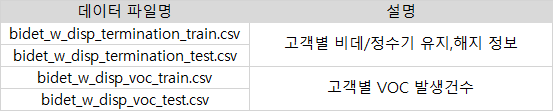

### 2) read_csv 사용하기

In [7]:
# 파일 읽어서 데이터프레임에 저장하기
train_termination = pd.read_csv('bidet_w_disp_termination_train.csv')
test_termination = pd.read_csv('bidet_w_disp_termination_test.csv')
train_voc = pd.read_csv('bidet_w_disp_voc_train.csv')
test_voc = pd.read_csv('bidet_w_disp_voc_test.csv')

## 2. 데이터 구조 확인하기

### 1) 데이터 설명

**■ 비데/정수기 유지, 해지 정보(train_termination, test_termination)**  
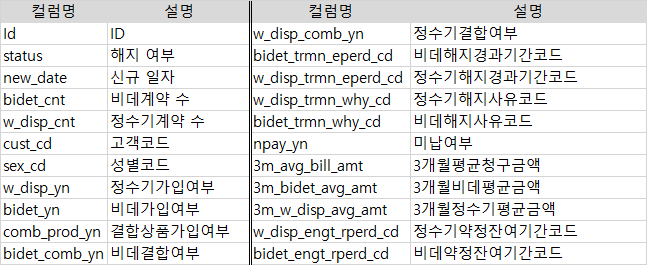

**■ 고객별 VOC발생 건수(train_voc, test_voc)**      
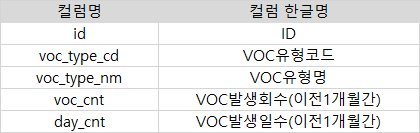

### 2) info 함수를 활용하여 데이터프레임 정보 확인하기

In [8]:
# train_termination 데이터프레임의 기본적인 형태와 정보 확인하기
train_termination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    55000 non-null  object 
 1   status                55000 non-null  object 
 2   new_date              55000 non-null  int64  
 3   bidet_cnt             55000 non-null  int64  
 4   w_disp_cnt            54990 non-null  float64
 5   cust_cd               55000 non-null  int64  
 6   sex_cd                55000 non-null  object 
 7   w_disp_yn             55000 non-null  object 
 8   bidet_yn              55000 non-null  object 
 9   comb_prod_yn          55000 non-null  object 
 10  bidet_comb_yn         55000 non-null  object 
 11  w_disp_comb_yn        55000 non-null  object 
 12  bidet_trmn_eperd_cd   55000 non-null  object 
 13  w_disp_trmn_eperd_cd  55000 non-null  object 
 14  w_disp_trmn_why_cd    55000 non-null  object 
 15  bidet_trmn_why_cd  

In [9]:
# train_voc 데이터프레임의 기본적인 형태와 정보 확인하기
train_voc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74529 entries, 0 to 74528
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           74529 non-null  object
 1   voc_type_cd  74529 non-null  int64 
 2   voc_type_nm  74529 non-null  object
 3   voc_cnt      74529 non-null  int64 
 4   day_cnt      74529 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.8+ MB


### 3) head 메소드를 활용하여 데이터프레임 살펴보기

In [10]:
# head 메소드를 활용하여 train_termination 실제 데이터 확인하기
train_termination.head()

,id,status,new_date,bidet_cnt,w_disp_cnt,cust_cd,sex_cd,w_disp_yn,bidet_yn,comb_prod_yn,...,bidet_trmn_eperd_cd,w_disp_trmn_eperd_cd,w_disp_trmn_why_cd,bidet_trmn_why_cd,npay_yn,3m_avg_bill_amt,3m_bidet_avg_amt,3m_w_disp_avg_amt,w_disp_engt_rperd_cd,bidet_engt_rperd_cd
0,E1000001,Y,20170421,1,0.0,10001,F,Y,Y,Y,...,_,_,_,_,Y,381711.000,40393,43560,R09,R12
1,E1000002,N,20131203,2,0.0,10001,M,N,Y,N,...,_,_,_,_,N,110100.000,34460,0,_,R06
2,E1000003,N,20170731,1,1.0,10001,M,Y,N,Y,...,_,_,_,_,N,90000.000,0,28600,0,_
3,E1000004,Y,20090930,4,1.0,10001,F,Y,Y,Y,...,_,_,_,_,Y,218303.001,34747,55000,P36,R11
4,E1000005,N,20151121,1,1.0,10001,F,Y,Y,Y,...,_,_,_,_,N,310095.999,59856,54082,R27,R22


In [11]:
# head 메소드를 활용하여 train_voc 실제 데이터 확인하기
train_voc.head()

,id,voc_type_cd,voc_type_nm,voc_cnt,day_cnt
0,E1000001,6,청구 수/미납,1,1
1,E1000002,9,해지,1,1
2,E1000003,12,업무협조,1,1
3,E1000004,7,AS,1,1
4,E1000004,8,품질,1,1


## 3. 데이터프레임 합치기

### 1) 피벗테이블(pivot_table)로 집계하기

In [12]:
# values: 계산 대상, aggfunc: 계산 유형, index: 행 인덱스, columns: 열 인덱스
train_voc_pivot=train_voc.pivot_table(values='voc_cnt',aggfunc='sum',index='id',columns='voc_type_nm',fill_value=0)
train_voc_pivot

voc_type_nm,AS,가입,개통,대리점문의,변경/조회,업무협조,이용,정보보호/언론보도,채널,청구 수/미납,품질,해지,혜택
id,,,,,,,,,,,,,
E1000001,0,0,0,0,0,0,0,0,0,1,0,0,0
E1000002,0,0,0,0,0,0,0,0,0,0,0,1,0
E1000003,0,0,0,0,0,1,0,0,0,0,0,0,0
E1000004,1,0,0,0,0,0,0,0,0,0,1,0,0
E1000005,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
E1054996,0,0,0,0,0,0,0,0,0,0,1,0,0
E1054997,0,0,0,0,0,0,0,0,0,0,0,1,0
E1054998,0,0,0,0,0,2,0,0,0,0,0,0,0


In [13]:
# VOC건수(voc_cnt)별, VOC발생일수(day_cnt)별, train/test 각각 피벗테이블 생성하기
train_voc_cnt=train_voc.pivot_table(values='voc_cnt',aggfunc='sum',index='id',columns='voc_type_nm',fill_value=0)
train_day_cnt=train_voc.pivot_table(values='day_cnt',aggfunc='sum',index='id',columns='voc_type_nm',fill_value=0)
test_voc_cnt=test_voc.pivot_table(values='voc_cnt',aggfunc='sum',index='id',columns='voc_type_nm',fill_value=0)
test_day_cnt=test_voc.pivot_table(values='day_cnt',aggfunc='sum',index='id',columns='voc_type_nm',fill_value=0)

In [14]:
# pivot_table로 집계 전 VOC건수 확인하여 검증하기
train_voc['voc_cnt'].sum(),train_voc['day_cnt'].sum(),test_voc['voc_cnt'].sum(),test_voc['day_cnt'].sum()

(90752, 82858, 8469, 7702)

In [15]:
# pivot_table로 집계 후 VOC건수 확인하여 검증하기
train_voc_cnt.sum().sum(),train_day_cnt.sum().sum(),test_voc_cnt.sum().sum(),test_day_cnt.sum().sum()

(90752, 82858, 8469, 7702)

### 2) 데이터프레임 병합하기

In [16]:
# 각 데이터프레임의 인덱스를 리셋하고, 기존 인덱스는 drop하기(drop=True)
train_voc_cnt=train_voc_cnt.reset_index(drop=True)
train_day_cnt=train_day_cnt.reset_index(drop=True)
test_voc_cnt=test_voc_cnt.reset_index(drop=True)
test_day_cnt=test_day_cnt.reset_index(drop=True)

In [17]:
# 결과 확인하기
train_voc_cnt

voc_type_nm,AS,가입,개통,대리점문의,변경/조회,업무협조,이용,정보보호/언론보도,채널,청구 수/미납,품질,해지,혜택
0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,0,0,0,0,0,0,0,0,0,0,1,0,0
54996,0,0,0,0,0,0,0,0,0,0,0,1,0
54997,0,0,0,0,0,2,0,0,0,0,0,0,0
54998,0,0,0,0,0,0,0,0,0,1,0,1,0


In [18]:
# 결과 확인하기
train_day_cnt

voc_type_nm,AS,가입,개통,대리점문의,변경/조회,업무협조,이용,정보보호/언론보도,채널,청구 수/미납,품질,해지,혜택
0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,0,0,0,0,0,0,0,0,0,0,1,0,0
54996,0,0,0,0,0,0,0,0,0,0,0,1,0
54997,0,0,0,0,0,1,0,0,0,0,0,0,0
54998,0,0,0,0,0,0,0,0,0,1,0,1,0


In [19]:
# 각 칼럼에 대해 반복문을 이용하여 칼럼명에 prefix를 붙이기
for col in train_voc_cnt.columns:
    train_voc_cnt.rename(columns={col:'voc_cnt_'+col},inplace=True) 
    train_day_cnt.rename(columns={col:'day_cnt_'+col},inplace=True)

for col in test_voc_cnt.columns:
    test_voc_cnt.rename(columns={col:'voc_cnt_'+col},inplace=True)
    test_day_cnt.rename(columns={col:'day_cnt_'+col},inplace=True)

In [20]:
train_termination.head()

,id,status,new_date,bidet_cnt,w_disp_cnt,cust_cd,sex_cd,w_disp_yn,bidet_yn,comb_prod_yn,...,bidet_trmn_eperd_cd,w_disp_trmn_eperd_cd,w_disp_trmn_why_cd,bidet_trmn_why_cd,npay_yn,3m_avg_bill_amt,3m_bidet_avg_amt,3m_w_disp_avg_amt,w_disp_engt_rperd_cd,bidet_engt_rperd_cd
0,E1000001,Y,20170421,1,0.0,10001,F,Y,Y,Y,...,_,_,_,_,Y,381711.000,40393,43560,R09,R12
1,E1000002,N,20131203,2,0.0,10001,M,N,Y,N,...,_,_,_,_,N,110100.000,34460,0,_,R06
2,E1000003,N,20170731,1,1.0,10001,M,Y,N,Y,...,_,_,_,_,N,90000.000,0,28600,0,_
3,E1000004,Y,20090930,4,1.0,10001,F,Y,Y,Y,...,_,_,_,_,Y,218303.001,34747,55000,P36,R11
4,E1000005,N,20151121,1,1.0,10001,F,Y,Y,Y,...,_,_,_,_,N,310095.999,59856,54082,R27,R22


In [21]:
train_voc_cnt.head()

voc_type_nm,voc_cnt_AS,voc_cnt_가입,voc_cnt_개통,voc_cnt_대리점문의,voc_cnt_변경/조회,voc_cnt_업무협조,voc_cnt_이용,voc_cnt_정보보호/언론보도,voc_cnt_채널,voc_cnt_청구 수/미납,voc_cnt_품질,voc_cnt_해지,voc_cnt_혜택
0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0


In [22]:
train_day_cnt.head()

voc_type_nm,day_cnt_AS,day_cnt_가입,day_cnt_개통,day_cnt_대리점문의,day_cnt_변경/조회,day_cnt_업무협조,day_cnt_이용,day_cnt_정보보호/언론보도,day_cnt_채널,day_cnt_청구 수/미납,day_cnt_품질,day_cnt_해지,day_cnt_혜택
0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
# pd.concat([병합 대상 list],axis=1) 
train_data=pd.concat([train_termination,train_voc_cnt,train_day_cnt],axis=1)
test_data=pd.concat([test_termination,test_voc_cnt,test_day_cnt],axis=1)

# 병합 결과 확인하기
train_data.shape,test_data.shape

((55000, 48), (5000, 46))

In [24]:
# train_data의 칼럼중에서 test_data에 없는 칼럼 찾기
[x for x in train_data.columns.tolist() if x not in test_data.columns.tolist()]

['voc_cnt_대리점문의', 'day_cnt_대리점문의']

In [25]:
# train_data에만 존재하는 2개 칼럼 삭제하기
train_data.drop(['voc_cnt_대리점문의','day_cnt_대리점문의'],axis=1,inplace=True)

# 삭제 후 결과 확인하기
train_data.shape, test_data.shape

((55000, 46), (5000, 46))

## 4. 결측치 처리하기

### 1) 결측치 확인하기

In [26]:
# 결측치 존재 확인하기
train_data.isnull().sum().sum(),test_data.isnull().sum().sum()

(10, 0)

In [27]:
# 칼럼별 결측치 확인하기
train_data.isnull().sum().head(10)

id               0
status           0
new_date         0
bidet_cnt        0
w_disp_cnt      10
cust_cd          0
sex_cd           0
w_disp_yn        0
bidet_yn         0
comb_prod_yn     0
dtype: int64

In [28]:
# 결측치 상세 확인하기
train_data[train_data['w_disp_cnt'].isnull()]

,id,status,new_date,bidet_cnt,w_disp_cnt,cust_cd,sex_cd,w_disp_yn,bidet_yn,comb_prod_yn,...,day_cnt_개통,day_cnt_변경/조회,day_cnt_업무협조,day_cnt_이용,day_cnt_정보보호/언론보도,day_cnt_채널,day_cnt_청구 수/미납,day_cnt_품질,day_cnt_해지,day_cnt_혜택
50,E1000051,Y,20200515,0,NaN,10001,F,Y,Y,Y,...,0,0,0,0,0,0,1,0,0,0
51,E1000052,N,20150416,0,NaN,10001,F,Y,Y,Y,...,0,0,0,0,0,0,0,1,1,0
52,E1000053,N,20121022,1,NaN,10001,M,N,Y,N,...,0,0,0,0,0,0,0,0,0,1
53,E1000054,N,20160210,2,NaN,10001,F,N,Y,N,...,0,1,0,1,0,1,0,0,1,0
54,E1000055,N,20161028,1,NaN,10001,M,N,Y,N,...,0,1,1,0,0,0,1,0,0,0
55,E1000056,Y,20130515,3,NaN,10001,M,Y,Y,Y,...,0,0,0,0,0,0,0,1,0,0
56,E1000057,Y,20200716,1,NaN,10001,F,Y,Y,Y,...,1,1,0,0,0,0,0,0,0,0
57,E1000058,Y,20190209,5,NaN,10001,M,Y,Y,Y,...,0,0,0,0,0,0,0,0,0,0
58,E1000059,N,20171023,2,NaN,10001,F,N,Y,Y,...,0,1,0,0,0,0,0,0,0,0
59,E1000060,Y,20180927,1,NaN,10001,M,Y,Y,Y,...,0,0,1,0,0,0,0,0,0,0


### 2) 결측치 대체하기

In [29]:
# 평균값, 중위값, 최빈값 확인하기
print("평균값:",train_data['w_disp_cnt'].mean())
print("중위값:",train_data['w_disp_cnt'].median())
print("최빈값:",train_data['w_disp_cnt'].mode())

평균값: 0.7372067648663393
중위값: 1.0
최빈값: 0    1.0
Name: w_disp_cnt, dtype: float64


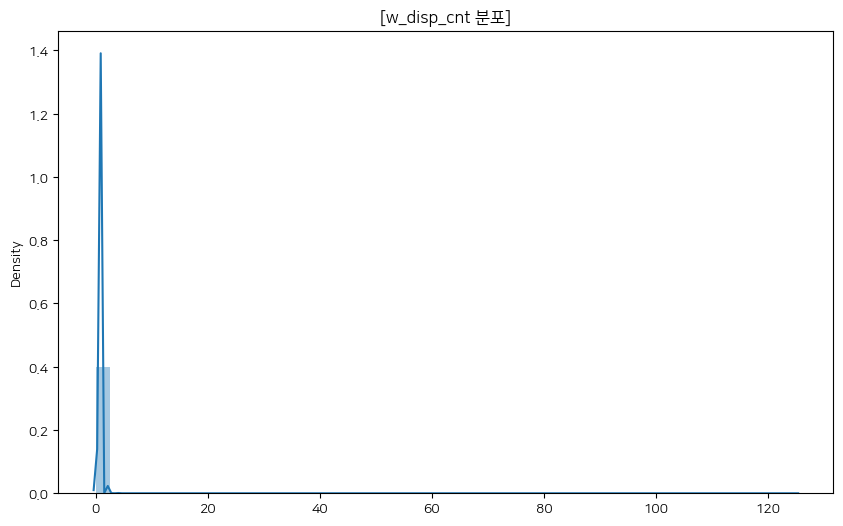

In [30]:
# 그래프의 크기 지정하기
plt.figure(figsize=(10,6)) 
# distplot 생성하기
sns.distplot(x=train_data['w_disp_cnt'])
# 그래프의 제목 지정하기
plt.title("[w_disp_cnt 분포]") 
plt.show()

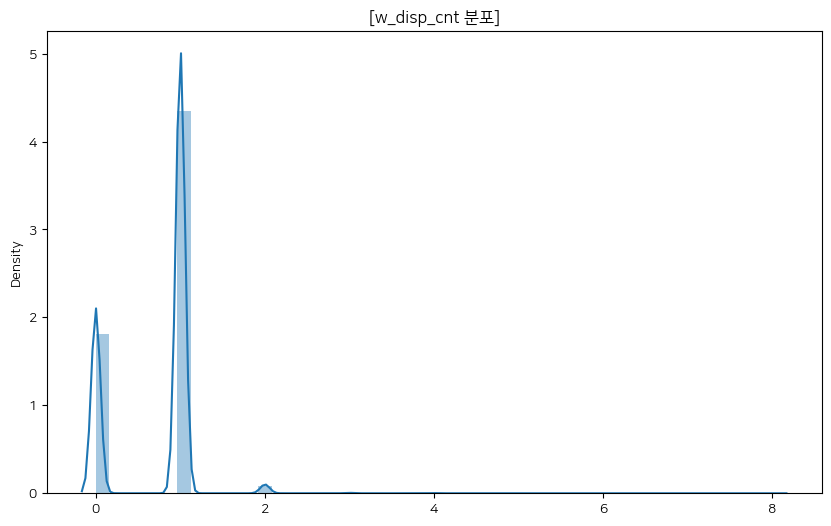

In [31]:
# 그래프 크기 지정하기
plt.figure(figsize=(10,6)) 
# 디스트플롯 생성하기 # 차트의 크기 지정
sns.distplot(x=train_data[train_data['w_disp_cnt']<10]['w_disp_cnt']) 
# 그래프의 제목 지정하기
plt.title("[w_disp_cnt 분포]") 
plt.show()

In [32]:
# df.fillna("대체값", inplace=True)
train_data['w_disp_cnt'].fillna(train_data['w_disp_cnt'].median(),inplace=True)

# 결측치 제거 결과 확인하기
train_data.isnull().sum().sum(),test_data.isnull().sum().sum()

(0, 0)

## 5. 데이터 유형 변경하기

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    55000 non-null  object 
 1   status                55000 non-null  object 
 2   new_date              55000 non-null  int64  
 3   bidet_cnt             55000 non-null  int64  
 4   w_disp_cnt            55000 non-null  float64
 5   cust_cd               55000 non-null  int64  
 6   sex_cd                55000 non-null  object 
 7   w_disp_yn             55000 non-null  object 
 8   bidet_yn              55000 non-null  object 
 9   comb_prod_yn          55000 non-null  object 
 10  bidet_comb_yn         55000 non-null  object 
 11  w_disp_comb_yn        55000 non-null  object 
 12  bidet_trmn_eperd_cd   55000 non-null  object 
 13  w_disp_trmn_eperd_cd  55000 non-null  object 
 14  w_disp_trmn_why_cd    55000 non-null  object 
 15  bidet_trmn_why_cd  

In [34]:
# 실제와 데이터 유형이 다른 칼럼 확인하기
train_data.loc[:5,['new_date','cust_cd']]

,new_date,cust_cd
0,20170421,10001
1,20131203,10001
2,20170731,10001
3,20090930,10001
4,20151121,10001
5,20120711,10001


### 1) new_date(신규 일자)를 datetime(날짜형)으로 변경

In [35]:
# String을 datetime으로 변경하기
def GetDateTime(date):
    date = datetime.strptime(str(date),'%Y%m%d')
    return date

# map함수로 new_date에 GetDateTime 함수를 적용하여 datetime으로 변경하기
train_data['new_date']=train_data['new_date'].map(lambda x: GetDateTime(x))
test_data['new_date']=test_data['new_date'].map(lambda x: GetDateTime(x))

# 데이터 유형 확인하기
print('new_date: ',train_data['new_date'].dtype)

new_date:  datetime64[ns]


### 2) cust_cd(고객코드)를 object로 변경

In [36]:
# astype() 함수로 데이터 유형 변경하기
train_data['cust_cd']=train_data['cust_cd'].astype('O')
test_data['cust_cd']=test_data['cust_cd'].astype('O')

# 데이터 유형 확인하기
print('cust_cd: ',train_data['cust_cd'].dtype)

cust_cd:  object


## 6. 파생 변수 추가하기

### 1) new_date(신규일자) 관련 파생 변수 추가

In [37]:
# 데이터의 최댓값 확인하기
train_data['new_date'].max(),test_data['new_date'].max()

(Timestamp('2020-08-31 00:00:00'), Timestamp('2020-09-30 00:00:00'))

In [38]:
# 샘플 코드 확인하기
(datetime(2020,8,31,0,0) - train_data['new_date']).head()

0   1228 days
1   2463 days
2   1127 days
3   3988 days
4   1745 days
Name: new_date, dtype: timedelta64[ns]

In [39]:
# timedelta64형인 가입기간을 int형으로 변경(.dt.days붙임)하여 파생 변수 추가하기
train_data['join_period']=(datetime(2020,8,31,0,0) - train_data['new_date']).dt.days
test_data['join_period']=(datetime(2020,9,30,0,0) - test_data['new_date']).dt.days

train_data['join_period'].head()

0    1228
1    2463
2    1127
3    3988
4    1745
Name: join_period, dtype: int64

### 2) XXX(상품, 예)fountain,bidet)_trmn_eperd_cd(해지경과기간코드) 관련 파생 변수 추가하기

In [40]:
# 대상 칼럼 리스트 지정하기
teperd_cols=['w_disp_trmn_eperd_cd','bidet_trmn_eperd_cd']

In [41]:
# 대상 칼럼 확인하기
train_data.loc[:,teperd_cols]

,w_disp_trmn_eperd_cd,bidet_trmn_eperd_cd
0,_,_
1,_,_
2,_,_
3,_,_
4,_,_
...,...,...
54995,_,_
54996,_,R37
54997,_,_
54998,_,_


In [42]:
# w_disp_trmn_eperd_cd의 범주 분포 확인하기
train_data['w_disp_trmn_eperd_cd'].value_counts()

_      51578
R37     1161
0        462
R01      120
R02       86
R06       85
R05       82
R04       78
R03       69
R09       67
R28       63
R18       60
R11       58
R15       55
R07       54
R12       53
R10       53
R25       51
R14       50
R17       48
R08       46
R26       45
R19       45
R16       43
R27       40
R21       39
R35       39
R24       38
R23       37
R13       37
R30       34
R29       32
R32       31
R20       31
R22       30
R31       30
R34       28
R36       26
R33       16
Name: w_disp_trmn_eperd_cd, dtype: int64

In [43]:
# RXX 코드를 정수형(int)로 변경하기 위한 함수 정의하기
def Rcdtoint(Rcd):
    if Rcd=='_': # 해지하지 않음
        return 38
    elif Rcd=='0': # 해지 당월
        return 0
    else:
        return int(Rcd[1:3]) # 해지 후 경과 기간 숫자 부분만 남기기

# 반복문 수행하면서 teperd_cols에 Rcdtoint() 함수 적용하기
for column in teperd_cols:
    new_column=column.replace('_trmn_eperd_cd','_teperd')
    train_data[new_column]=train_data[column].apply(lambda x:Rcdtoint(x))
    test_data[new_column]=test_data[column].apply(lambda x:Rcdtoint(x))

train_data.iloc[:,-2:]

,w_disp_teperd,bidet_teperd
0,38,38
1,38,38
2,38,38
3,38,38
4,38,38
...,...,...
54995,38,38
54996,38,37
54997,38,38
54998,38,38


### 3)	XXX(상품, 예)fountain,bidet)__engt_rperd_cd(약정잔여기간코드) 관련 파생 변수 추가하기

In [44]:
# 대상 칼럼 리스트 지정하기
erperd_cols=['w_disp_engt_rperd_cd', 'bidet_engt_rperd_cd']

# 대상 칼럼 리스트 확인하기
train_data.loc[:,erperd_cols].head() 

,w_disp_engt_rperd_cd,bidet_engt_rperd_cd
0,R09,R12
1,_,R06
2,0,_
3,P36,R11
4,R27,R22


In [45]:
# bidet_engt_rperd_cd의 범주 분포 확인하기
train_data['bidet_engt_rperd_cd'].value_counts()

_      10996
R12     3864
R07     2108
R06     1940
R11     1888
       ...  
P33       29
P35       20
P36       20
P34       19
R34        1
Name: bidet_engt_rperd_cd, Length: 71, dtype: int64

In [46]:
# bidet_engt_rperd_cd의 범주값 확인하기
train_data['bidet_engt_rperd_cd'].value_counts().index

Index(['_', 'R12', 'R07', 'R06', 'R11', 'R10', 'R09', 'R13', 'R24', 'R08',
       'R23', 'R14', 'R22', 'R05', 'R15', 'R04', 'R21', 'R02', 'R01', 'R30',
       'R20', 'R18', 'R16', 'R03', 'R19', 'R29', 'R17', '0', 'R28', 'R25',
       'P37', 'R26', 'R27', 'P01', '|', 'P02', 'P04', 'P06', 'P03', 'P07',
       'P05', 'P08', 'P09', 'P11', 'P12', 'P10', 'P15', 'P14', 'P13', 'P16',
       'P18', 'P19', 'P22', 'P20', 'P21', 'P17', 'P24', 'P23', 'P26', 'P25',
       'P28', 'P31', 'P32', 'P27', 'P30', 'P29', 'P33', 'P35', 'P36', 'P34',
       'R34'],
      dtype='object')

In [47]:
# RXX, PXX 코드를 정수형(int)로 변경하기 위한 함수 정의하기
def RPcdtoint(RPcd):
    if RPcd=='_': # 무약정
        return int(38)
    elif RPcd=='0': # 약정 만료월
        return int(0)
    elif RPcd[0]=='P': # 약정 만료 후 경과 기간
        return int(RPcd[1:3])
    elif RPcd=='|': # 이미 해지하여 무약정
        return int(0)
    else: # R이면
        return -int(RPcd[1:3]) # 잔여 약정기간 음수처리

# 반복문 수행하면서 erperd_cols에 RPcdtoint() 함수 적용하기
for column in erperd_cols:
    new_column=column.replace('_engt_rperd_cd','_erperd')
    train_data[new_column]='' # 새로운 칼럼 추가하기
    test_data[new_column]='' # 새로운 칼럼 추가하기
    train_data[new_column]=train_data[column].map(lambda x:RPcdtoint(x))
    test_data[new_column]=test_data[column].map(lambda x:RPcdtoint(x))

train_data.iloc[:,-2:].head()

,w_disp_erperd,bidet_erperd
0,-9,-12
1,38,-6
2,0,38
3,36,-11
4,-27,-22


## 7. 불필요한 칼럼 삭제하기

In [48]:
# 빈 리스트 생성하기
del_cols=[]

### 1) id 칼럼 처리하기

In [49]:
# del_cols에 id 추가하기
del_cols.append('id')

### 2) 단일값이거나 데이터 불균형이 심한 칼럼 처리하기

In [50]:
# 수치형 칼럼을 리스트에 담기
numbers=['int64','float64'] 

# 수치형 타입 리스트
num_cols = train_data.select_dtypes(numbers).columns 

# 수치형 칼럼을 리스트 생성하기
num_cols

Index(['bidet_cnt', 'w_disp_cnt', '3m_avg_bill_amt', '3m_bidet_avg_amt',
       '3m_w_disp_avg_amt', 'voc_cnt_AS', 'voc_cnt_가입', 'voc_cnt_개통',
       'voc_cnt_변경/조회', 'voc_cnt_업무협조', 'voc_cnt_이용', 'voc_cnt_정보보호/언론보도',
       'voc_cnt_채널', 'voc_cnt_청구 수/미납', 'voc_cnt_품질', 'voc_cnt_해지',
       'voc_cnt_혜택', 'day_cnt_AS', 'day_cnt_가입', 'day_cnt_개통', 'day_cnt_변경/조회',
       'day_cnt_업무협조', 'day_cnt_이용', 'day_cnt_정보보호/언론보도', 'day_cnt_채널',
       'day_cnt_청구 수/미납', 'day_cnt_품질', 'day_cnt_해지', 'day_cnt_혜택',
       'join_period', 'w_disp_teperd', 'bidet_teperd', 'w_disp_erperd',
       'bidet_erperd'],
      dtype='object')

In [51]:
# 범주형 칼럼을 찾아서 리스트에 담기
obj_cols = train_data.select_dtypes('O').columns 
obj_cols

Index(['id', 'status', 'cust_cd', 'sex_cd', 'w_disp_yn', 'bidet_yn',
       'comb_prod_yn', 'bidet_comb_yn', 'w_disp_comb_yn',
       'bidet_trmn_eperd_cd', 'w_disp_trmn_eperd_cd', 'w_disp_trmn_why_cd',
       'bidet_trmn_why_cd', 'npay_yn', 'w_disp_engt_rperd_cd',
       'bidet_engt_rperd_cd'],
      dtype='object')

In [52]:
# 수치형 칼럼에 대한 기술 통계 확인하기
train_data.loc[:,num_cols].describe()

,bidet_cnt,w_disp_cnt,3m_avg_bill_amt,3m_bidet_avg_amt,3m_w_disp_avg_amt,voc_cnt_AS,voc_cnt_가입,voc_cnt_개통,voc_cnt_변경/조회,voc_cnt_업무협조,...,day_cnt_채널,day_cnt_청구 수/미납,day_cnt_품질,day_cnt_해지,day_cnt_혜택,join_period,w_disp_teperd,bidet_teperd,w_disp_erperd,bidet_erperd
count,55000.000000,55000.000000,5.500000e+04,5.500000e+04,5.500000e+04,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,...,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000
mean,2.596782,0.737255,2.915999e+05,3.441105e+04,4.162946e+04,0.043600,0.129927,0.019491,0.214673,0.332455,...,0.075455,0.219764,0.110327,0.272909,0.035927,1858.126418,36.910036,36.868073,14.556655,-0.750909
std,66.479010,1.137088,8.496803e+05,3.833091e+04,3.965128e+05,0.256391,0.366102,0.166522,0.552657,0.885980,...,0.316198,0.464854,0.351533,0.518703,0.204719,1616.054444,5.627786,5.708939,26.564439,22.156265
min,0.000000,0.000000,-1.136300e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.000000,-34.000000
25%,1.000000,0.000000,1.102485e+05,1.131050e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,748.000000,38.000000,38.000000,-9.000000,-15.000000
50%,1.000000,1.000000,1.994620e+05,3.107550e+04,3.266000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1357.000000,38.000000,38.000000,33.000000,-8.000000
75%,2.000000,1.000000,3.363403e+05,4.804125e+04,4.791800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2517.000000,38.000000,38.000000,38.000000,7.000000
max,5077.000000,125.000000,1.806220e+08,3.092769e+06,6.078027e+07,7.000000,6.000000,5.000000,59.000000,102.000000,...,9.000000,7.000000,7.000000,6.000000,6.000000,8396.000000,38.000000,38.000000,38.000000,38.000000


In [53]:
# 수치형 칼럼(num_cols)에 대해 0의 비중이 90%를 넘는 칼럼 찾기
for column in num_cols:
    if(((train_data[column]==0).sum()/55000) >0.9):
        print(column+':'+(str)((train_data[column]==0).sum()/55000))
        del_cols.append(column)  # del_cols에 해당 칼럼 추가하기

voc_cnt_AS:0.9651272727272727
voc_cnt_개통:0.9838181818181818
voc_cnt_정보보호/언론보도:0.9937090909090909
voc_cnt_채널:0.9343090909090909
voc_cnt_품질:0.9000363636363636
voc_cnt_혜택:0.9671818181818181
day_cnt_AS:0.9651272727272727
day_cnt_개통:0.9838181818181818
day_cnt_정보보호/언론보도:0.9937090909090909
day_cnt_채널:0.9343090909090909
day_cnt_품질:0.9000363636363636
day_cnt_혜택:0.9671818181818181


In [54]:
# 범주형 칼럼(obj_cols)에 대해 가장 많은 범주의 비중이 90%를 넘는 칼럼 찾기
for column in obj_cols:
    if((train_data[column].value_counts().iloc[0]/55000) >0.9):        
        print(column+':'+(str)(train_data[column].value_counts().iloc[0]/55000))
        del_cols.append(column)  # del_cols에 해당 칼럼 추가하기

cust_cd:0.9760181818181818
bidet_trmn_eperd_cd:0.9267454545454545
w_disp_trmn_eperd_cd:0.9377818181818182
w_disp_trmn_why_cd:0.9420363636363637
bidet_trmn_why_cd:0.9294363636363636


### 3) 파생 변수를 만들어 대체한 칼럼 처리하기

In [55]:
# del_cols에 삭제 대상 추가하기
del_cols=del_cols+['new_date','w_disp_engt_rperd_cd', 'bidet_engt_rperd_cd']

print(del_cols)

['id', 'voc_cnt_AS', 'voc_cnt_개통', 'voc_cnt_정보보호/언론보도', 'voc_cnt_채널', 'voc_cnt_품질', 'voc_cnt_혜택', 'day_cnt_AS', 'day_cnt_개통', 'day_cnt_정보보호/언론보도', 'day_cnt_채널', 'day_cnt_품질', 'day_cnt_혜택', 'cust_cd', 'bidet_trmn_eperd_cd', 'w_disp_trmn_eperd_cd', 'w_disp_trmn_why_cd', 'bidet_trmn_why_cd', 'new_date', 'w_disp_engt_rperd_cd', 'bidet_engt_rperd_cd']


### 4) 리스트에 저장한 삭제 대상 칼럼을 일괄 삭제하기

In [56]:
# 삭제 대상 칼럼을 train_data와 test_data에서 삭제하기
train_data.drop(del_cols,axis=1,inplace=True)
test_data.drop(del_cols,axis=1,inplace=True)
train_data.info() # 결과 확인하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             55000 non-null  object 
 1   bidet_cnt          55000 non-null  int64  
 2   w_disp_cnt         55000 non-null  float64
 3   sex_cd             55000 non-null  object 
 4   w_disp_yn          55000 non-null  object 
 5   bidet_yn           55000 non-null  object 
 6   comb_prod_yn       55000 non-null  object 
 7   bidet_comb_yn      55000 non-null  object 
 8   w_disp_comb_yn     55000 non-null  object 
 9   npay_yn            55000 non-null  object 
 10  3m_avg_bill_amt    55000 non-null  float64
 11  3m_bidet_avg_amt   55000 non-null  int64  
 12  3m_w_disp_avg_amt  55000 non-null  int64  
 13  voc_cnt_가입         55000 non-null  int64  
 14  voc_cnt_변경/조회      55000 non-null  int64  
 15  voc_cnt_업무협조       55000 non-null  int64  
 16  voc_cnt_이용         550

# SECTION 03. 데이터 이해하기 (EDA와 시각화)

## 1. 출력값(Label) 분석하기

In [57]:
# status값 분포 확인하기
train_data['status'].value_counts()

Y    31806
N    23194
Name: status, dtype: int64

<AxesSubplot:>

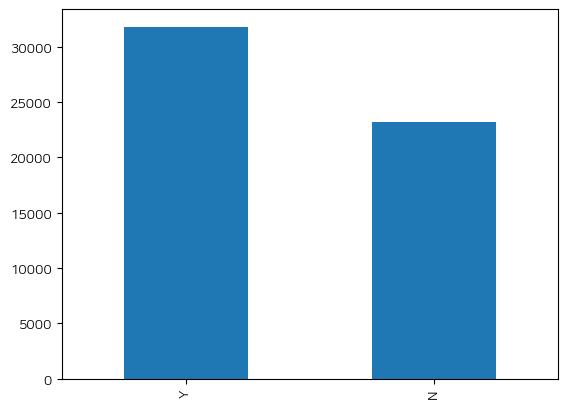

In [58]:
# status칼럼을 막대 그래프로 그리기
train_data['status'].value_counts().plot(kind='bar')

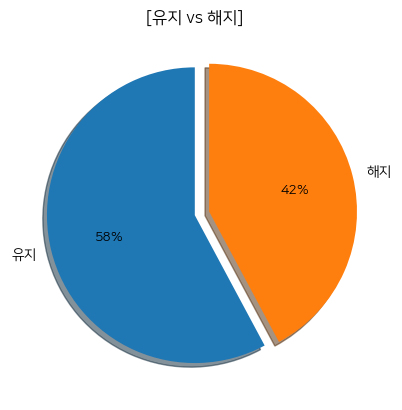

In [59]:
# status칼럼을 파이 그래프로 그리기
data = train_data['status'].value_counts() # chart를 그릴 데이터 생성하기
labels = ['유지','해지'] # chart에 들어갈 label 명칭 지정 안하면 'Y','N'이 됨

plt.pie(data, labels = labels, autopct='%.0f%%',shadow=True,explode=(0,0.1),startangle=90,)
plt.title("[유지 vs 해지]")
plt.show()

## 2. 수치형 데이터 분석하기

In [60]:
# 전처리 후에 변경이 있으므로 수치형 칼럼을 모은 num_cols 리스트를 다시 생성하기
numbers=['int64','float64']
num_cols = train_data.select_dtypes(numbers).columns

In [61]:
# 모든 수치형 칼럼에 대해 히스토그램을 그리는 함수
def make_histplot(df,num_cols,label):    
    col_cnt=4
    graph_size=5
    num=len(num_cols)
    print("대상 칼럼수:", num)
    
    # 그려야 할 전체 그래프의 크기를 정하기 
    plt.rcParams['figure.figsize']=(col_cnt*graph_size,math.ceil(num/col_cnt)*graph_size)
    
    # 그려야 할 각각의 그래프의 위치 정하기
    fig, ax = plt.subplots(ncols=col_cnt,nrows=math.ceil(num/col_cnt)) 
    i=0 
    for column in tqdm(num_cols):
        df[column].hist(ax=ax[int(i/col_cnt)][i%col_cnt]) # 도수분포표(histogrma) 그리기
        ax[int(i/col_cnt)][i%col_cnt].set_title('['+column+']') # 칼럼명을 제목으로 붙이기   
        i=i+1

    plt.show()
    plt.rcParams['figure.figsize']=(7,7) # figsize를 원복

대상 칼럼수: 22


100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 124.95it/s]


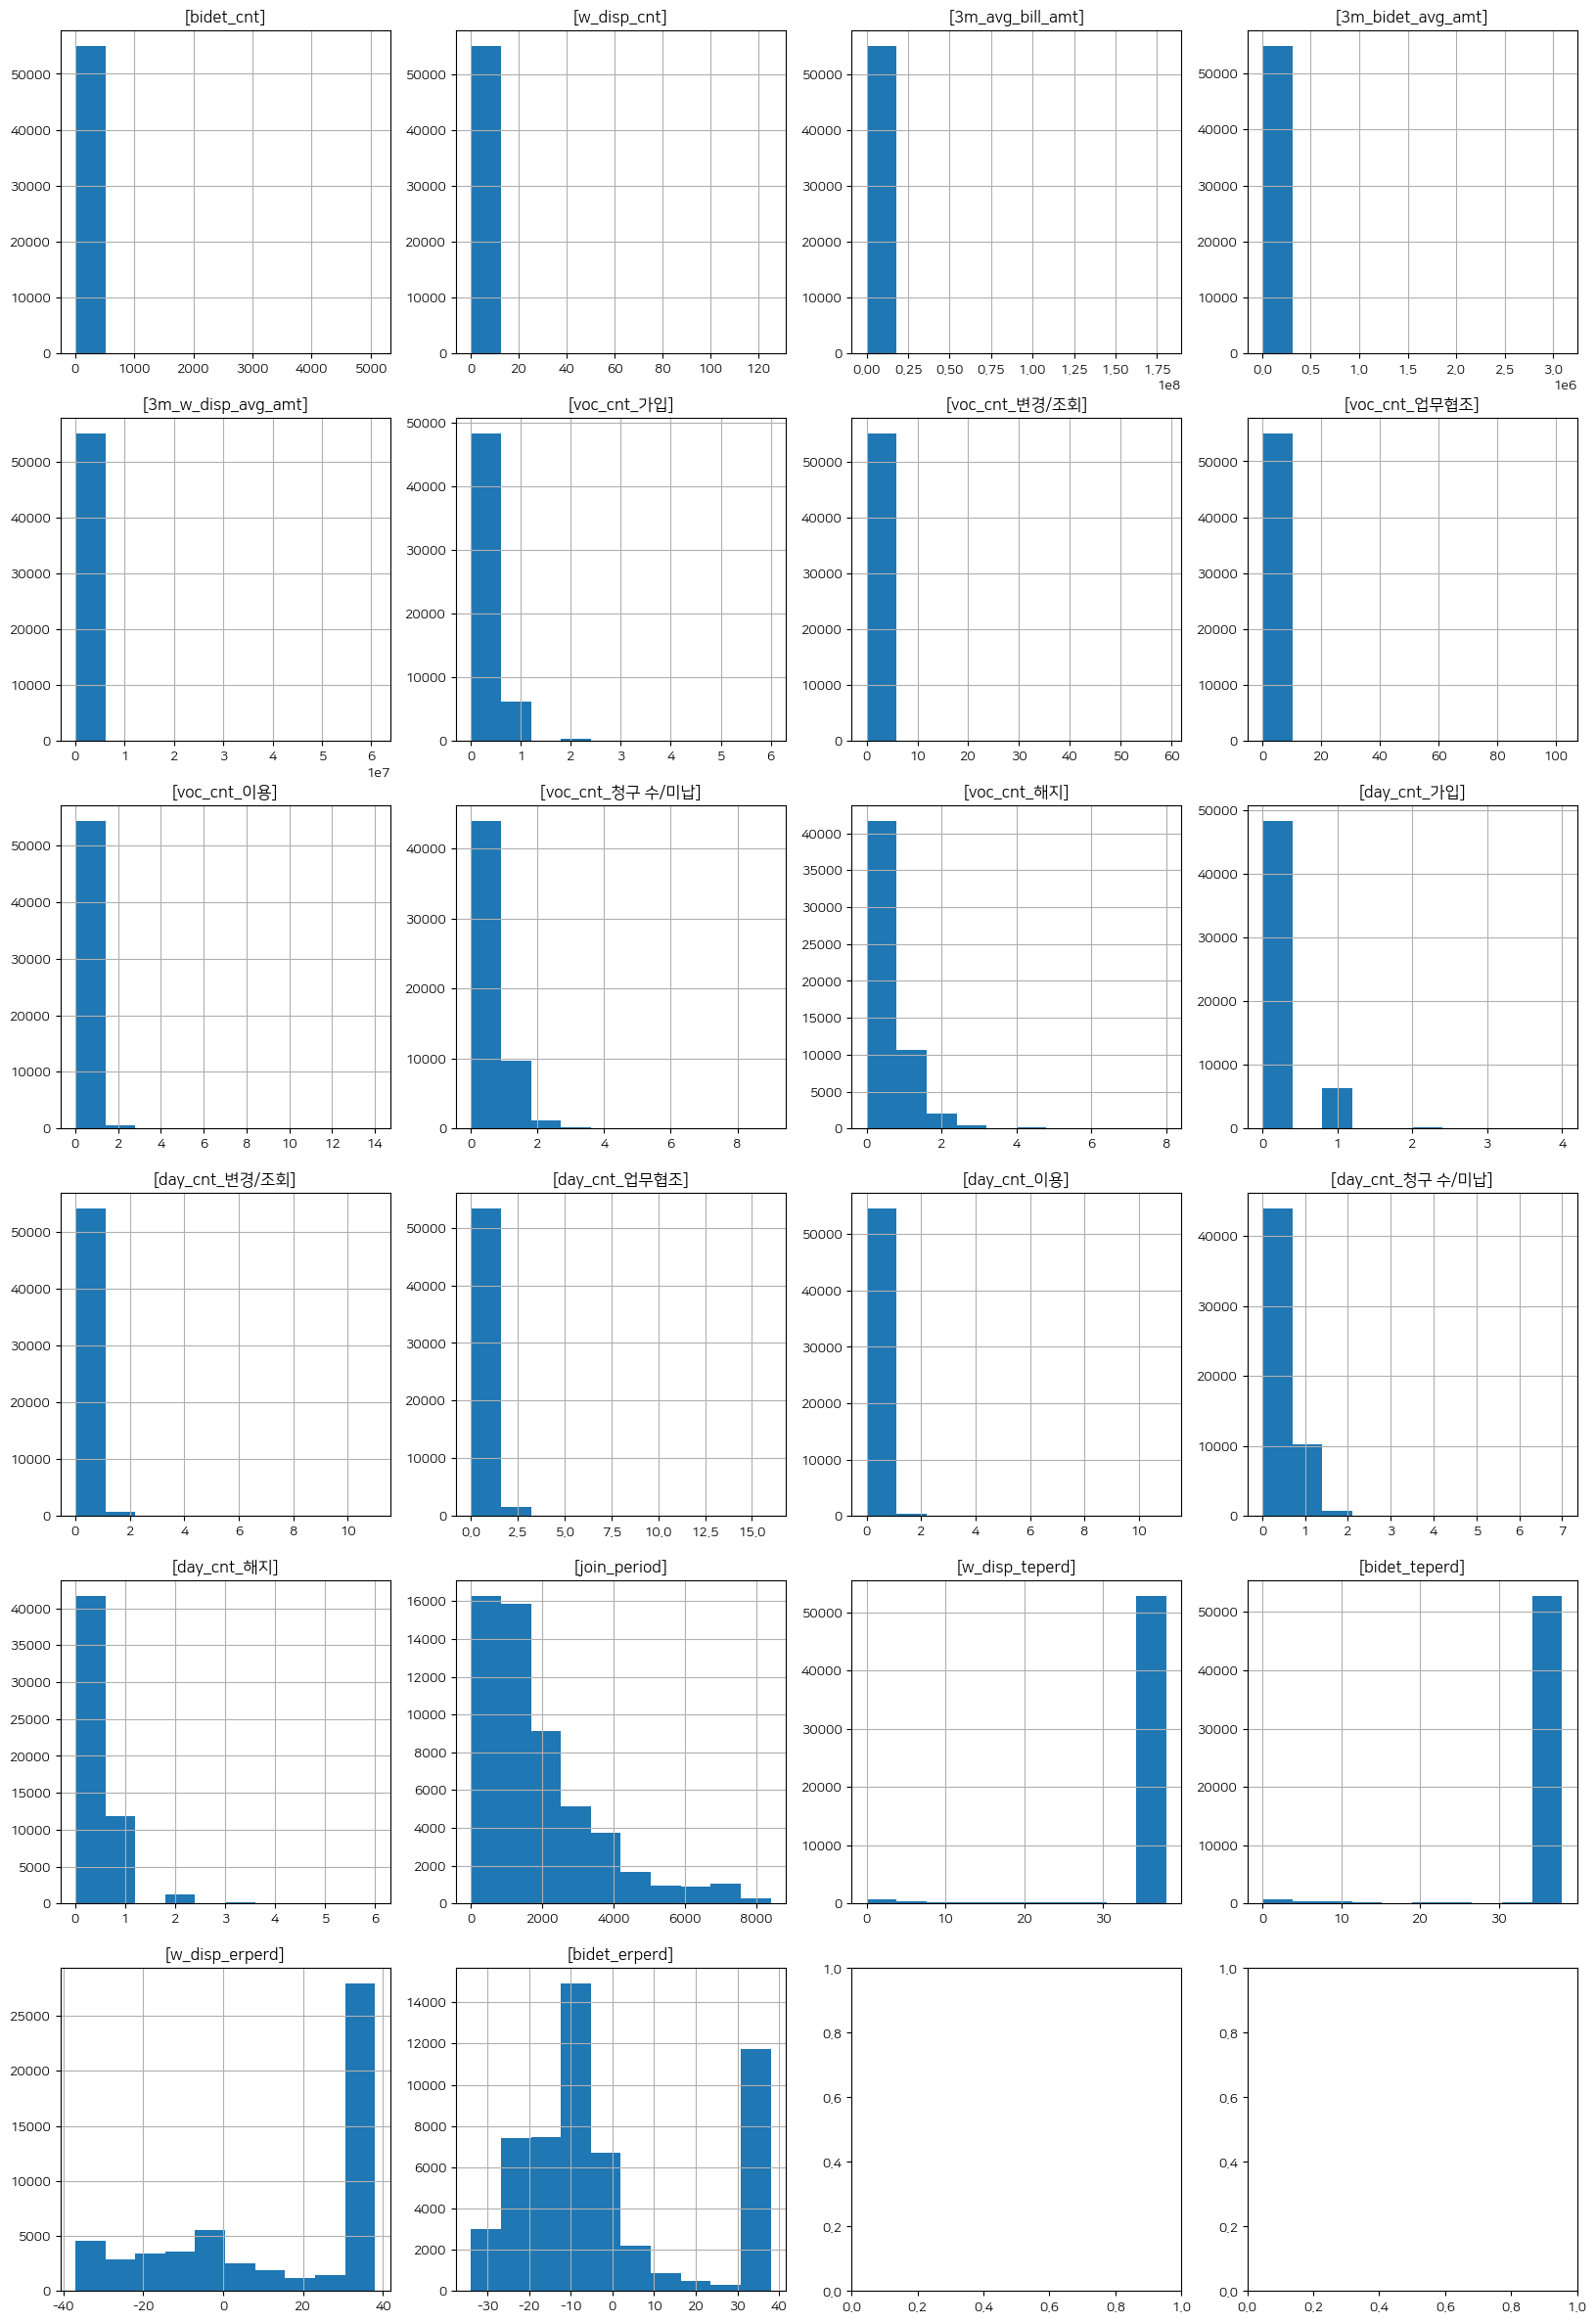

In [62]:
# 함수 실행하기
make_histplot(train_data,num_cols,'status')

## 3. 수치형 데이터의 이상치 제거하기

### 1) 이상치(Outlier) 확인하기

In [63]:
# 기술 통계 확인하기
train_data.describe()

,bidet_cnt,w_disp_cnt,3m_avg_bill_amt,3m_bidet_avg_amt,3m_w_disp_avg_amt,voc_cnt_가입,voc_cnt_변경/조회,voc_cnt_업무협조,voc_cnt_이용,voc_cnt_청구 수/미납,...,day_cnt_변경/조회,day_cnt_업무협조,day_cnt_이용,day_cnt_청구 수/미납,day_cnt_해지,join_period,w_disp_teperd,bidet_teperd,w_disp_erperd,bidet_erperd
count,55000.000000,55000.000000,5.500000e+04,5.500000e+04,5.500000e+04,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,...,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000
mean,2.596782,0.737255,2.915999e+05,3.441105e+04,4.162946e+04,0.129927,0.214673,0.332455,0.124055,0.232273,...,0.201436,0.284218,0.117691,0.219764,0.272909,1858.126418,36.910036,36.868073,14.556655,-0.750909
std,66.479010,1.137088,8.496803e+05,3.833091e+04,3.965128e+05,0.366102,0.552657,0.885980,0.398879,0.510258,...,0.447934,0.580211,0.362700,0.464854,0.518703,1616.054444,5.627786,5.708939,26.564439,22.156265
min,0.000000,0.000000,-1.136300e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.000000,-34.000000
25%,1.000000,0.000000,1.102485e+05,1.131050e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,748.000000,38.000000,38.000000,-9.000000,-15.000000
50%,1.000000,1.000000,1.994620e+05,3.107550e+04,3.266000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1357.000000,38.000000,38.000000,33.000000,-8.000000
75%,2.000000,1.000000,3.363403e+05,4.804125e+04,4.791800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2517.000000,38.000000,38.000000,38.000000,7.000000
max,5077.000000,125.000000,1.806220e+08,3.092769e+06,6.078027e+07,6.000000,59.000000,102.000000,14.000000,9.000000,...,11.000000,16.000000,11.000000,7.000000,6.000000,8396.000000,38.000000,38.000000,38.000000,38.000000


### 2) 이상치 제거 - Tukey Fences 방법 이해하기

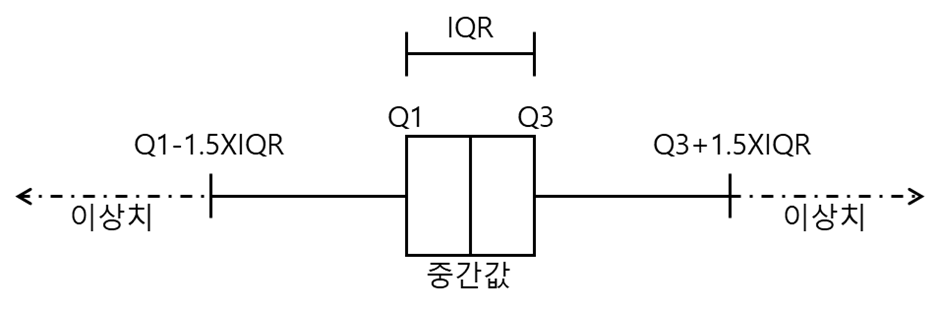

### 3) 이상치 제거 대상 선별하기

In [64]:
# 각 칼럼별 max값 확인하기
train_data.describe().loc['max']

bidet_cnt            5.077000e+03
w_disp_cnt           1.250000e+02
3m_avg_bill_amt      1.806220e+08
3m_bidet_avg_amt     3.092769e+06
3m_w_disp_avg_amt    6.078027e+07
voc_cnt_가입           6.000000e+00
voc_cnt_변경/조회        5.900000e+01
voc_cnt_업무협조         1.020000e+02
voc_cnt_이용           1.400000e+01
voc_cnt_청구 수/미납      9.000000e+00
voc_cnt_해지           8.000000e+00
day_cnt_가입           4.000000e+00
day_cnt_변경/조회        1.100000e+01
day_cnt_업무협조         1.600000e+01
day_cnt_이용           1.100000e+01
day_cnt_청구 수/미납      7.000000e+00
day_cnt_해지           6.000000e+00
join_period          8.396000e+03
w_disp_teperd        3.800000e+01
bidet_teperd         3.800000e+01
w_disp_erperd        3.800000e+01
bidet_erperd         3.800000e+01
Name: max, dtype: float64

In [65]:
# max값이 20초과인 칼럼을 리스트로 만들기
outlier_cols=train_data.describe().loc['max'][train_data.describe().loc['max']>20].index.tolist()
outlier_cols

['bidet_cnt',
 'w_disp_cnt',
 '3m_avg_bill_amt',
 '3m_bidet_avg_amt',
 '3m_w_disp_avg_amt',
 'voc_cnt_변경/조회',
 'voc_cnt_업무협조',
 'join_period',
 'w_disp_teperd',
 'bidet_teperd',
 'w_disp_erperd',
 'bidet_erperd']

### 4) 이상치 제거하기

In [66]:
# 이상치 기준이 되는 upperfence와 lowerfence지점의 위치 값을 계산하고 반환하기
def outliers_iqr(df,column,uorl,upper=75,lower=25,factor=1.5):
    q1,q3 = np.percentile(df[column],[lower,upper]) # 1분위 수, 3분위 수 구하기
    iqr=q3-q1
    if uorl=='l': # l이면 하한, u이면 상한
        return (q1-(iqr*factor))
    elif uorl=='u':
        return (q3+(iqr*factor))   

In [67]:
# 이상치(upperfence 초과)를 upperfence로 대체하는 함수, lower는 고려하지 않음
def replace_outlier(df,cols,upper=75,lower=25,factor=1.5):
    for column in cols:
        upperfence=outliers_iqr(df,column,'u',upper,lower,factor)
        df[column]=df[column].apply(lambda x: x if x <=upperfence else upperfence)        
        

In [68]:
# 시각화를 위한 데이터는 따로 복제하여 이상치를 제거하여 사용하기
train_data_del_outlier=train_data.copy()

replace_outlier(train_data_del_outlier,outlier_cols,factor=1.5)

## 4. 이상치 제거 후 수치형 데이터 분석하기

### 1) 히스토그램(histogram)

대상 칼럼수: 22


100%|█████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 140.87it/s]


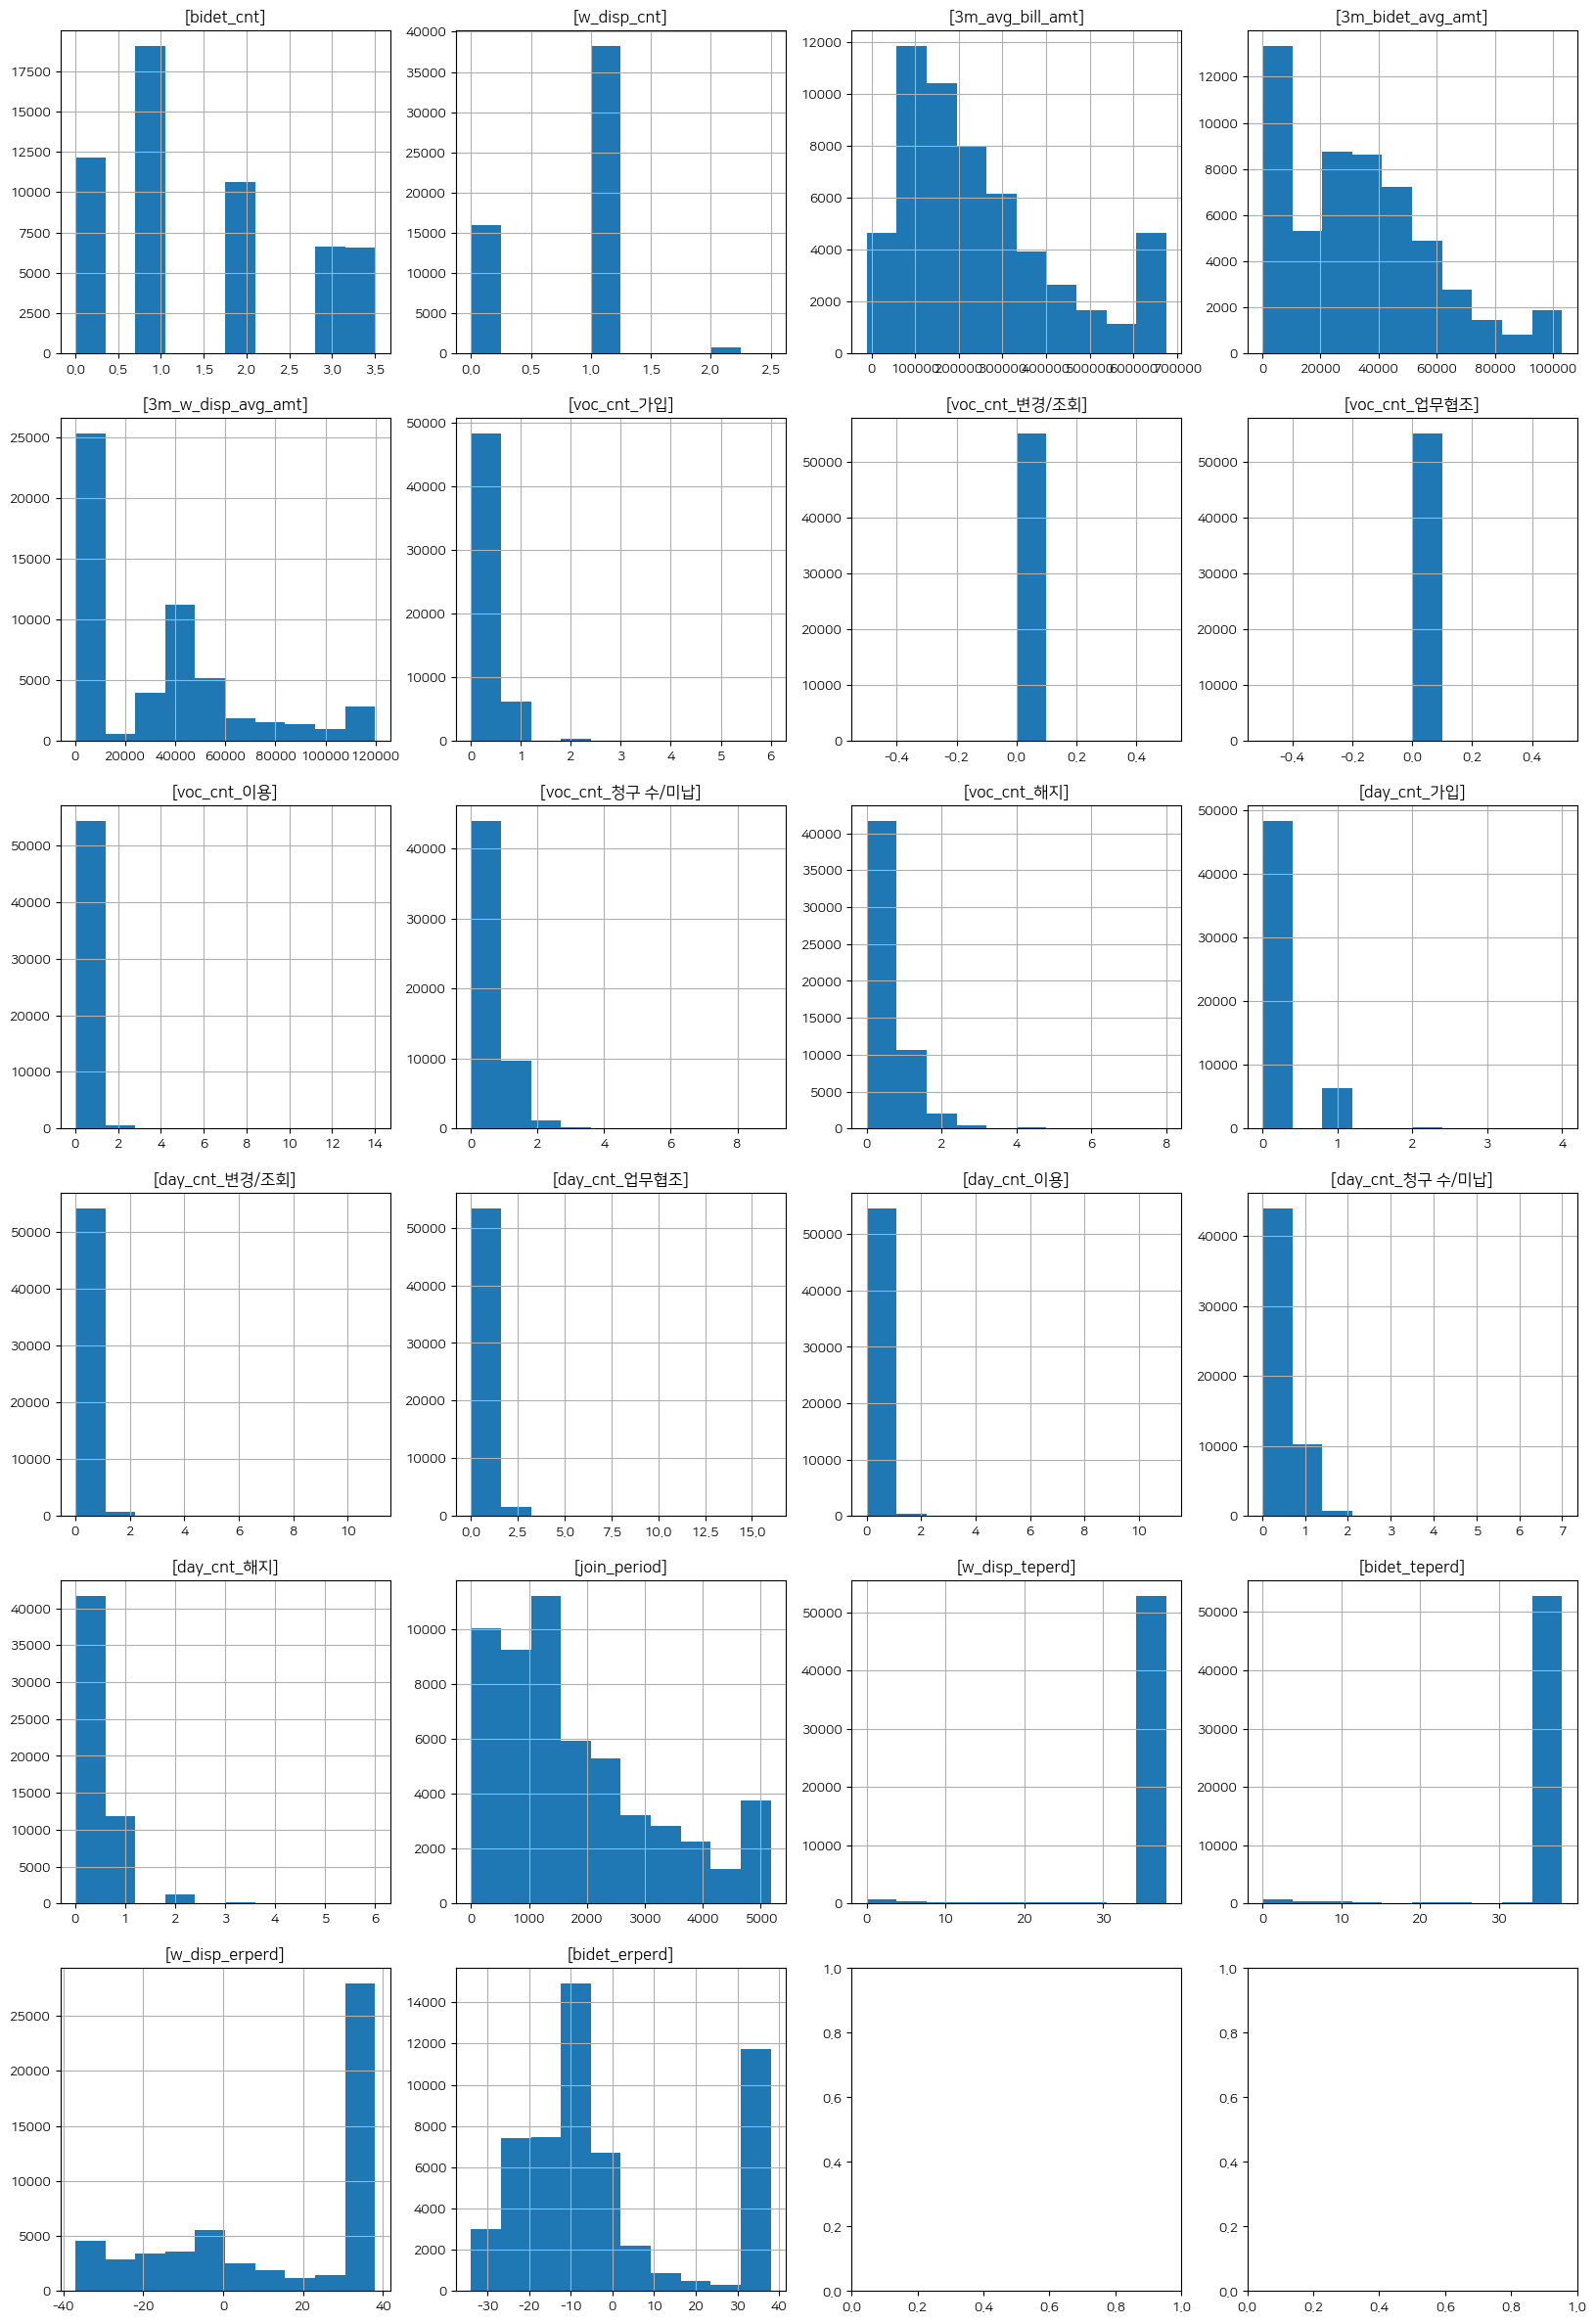

In [69]:
# 앞서 만든 함수로 수치형 칼럼에 대해 히스토그램 그리기
make_histplot(train_data_del_outlier,num_cols,'status')

### 2) 커널밀도추정그래프(kdeplot)

In [70]:
# 수치형 칼럼에 대해서 커널밀도추정그래프(kdeplot)을 그리는 함수
def make_kdeplot(df,num_cols,label):
    num=len(num_cols)
    col_cnt=4
    graph_size=5
    print("대상 칼럼수:", num)
    
    # 그려야할 전체 그래프의 크기를 정하기
    plt.rcParams['figure.figsize']=(col_cnt*graph_size,math.ceil(num/col_cnt)*graph_size) 
    
    # 그려야할 각각의 그래프의 위치 정하기 
    fig, ax = plt.subplots(ncols=col_cnt,nrows=math.ceil(num/col_cnt)) 
    i=0         
    for column in tqdm(num_cols):
        sns.kdeplot(data=df,x=column,hue=label,ax=ax[int(i/col_cnt)][i%col_cnt]) 
        ax[int(i/col_cnt)][i%col_cnt].set_title('['+column+']') #칼럼명을 제목으로 붙이기
        ax[int(i/col_cnt)][i%col_cnt].set_xlabel('') #x축의 이름을 공란으로 표기하기
        i=i+1

    plt.show()
    plt.rcParams['figure.figsize']=(7,7)

대상 칼럼수: 22


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:08<00:00,  2.71it/s]


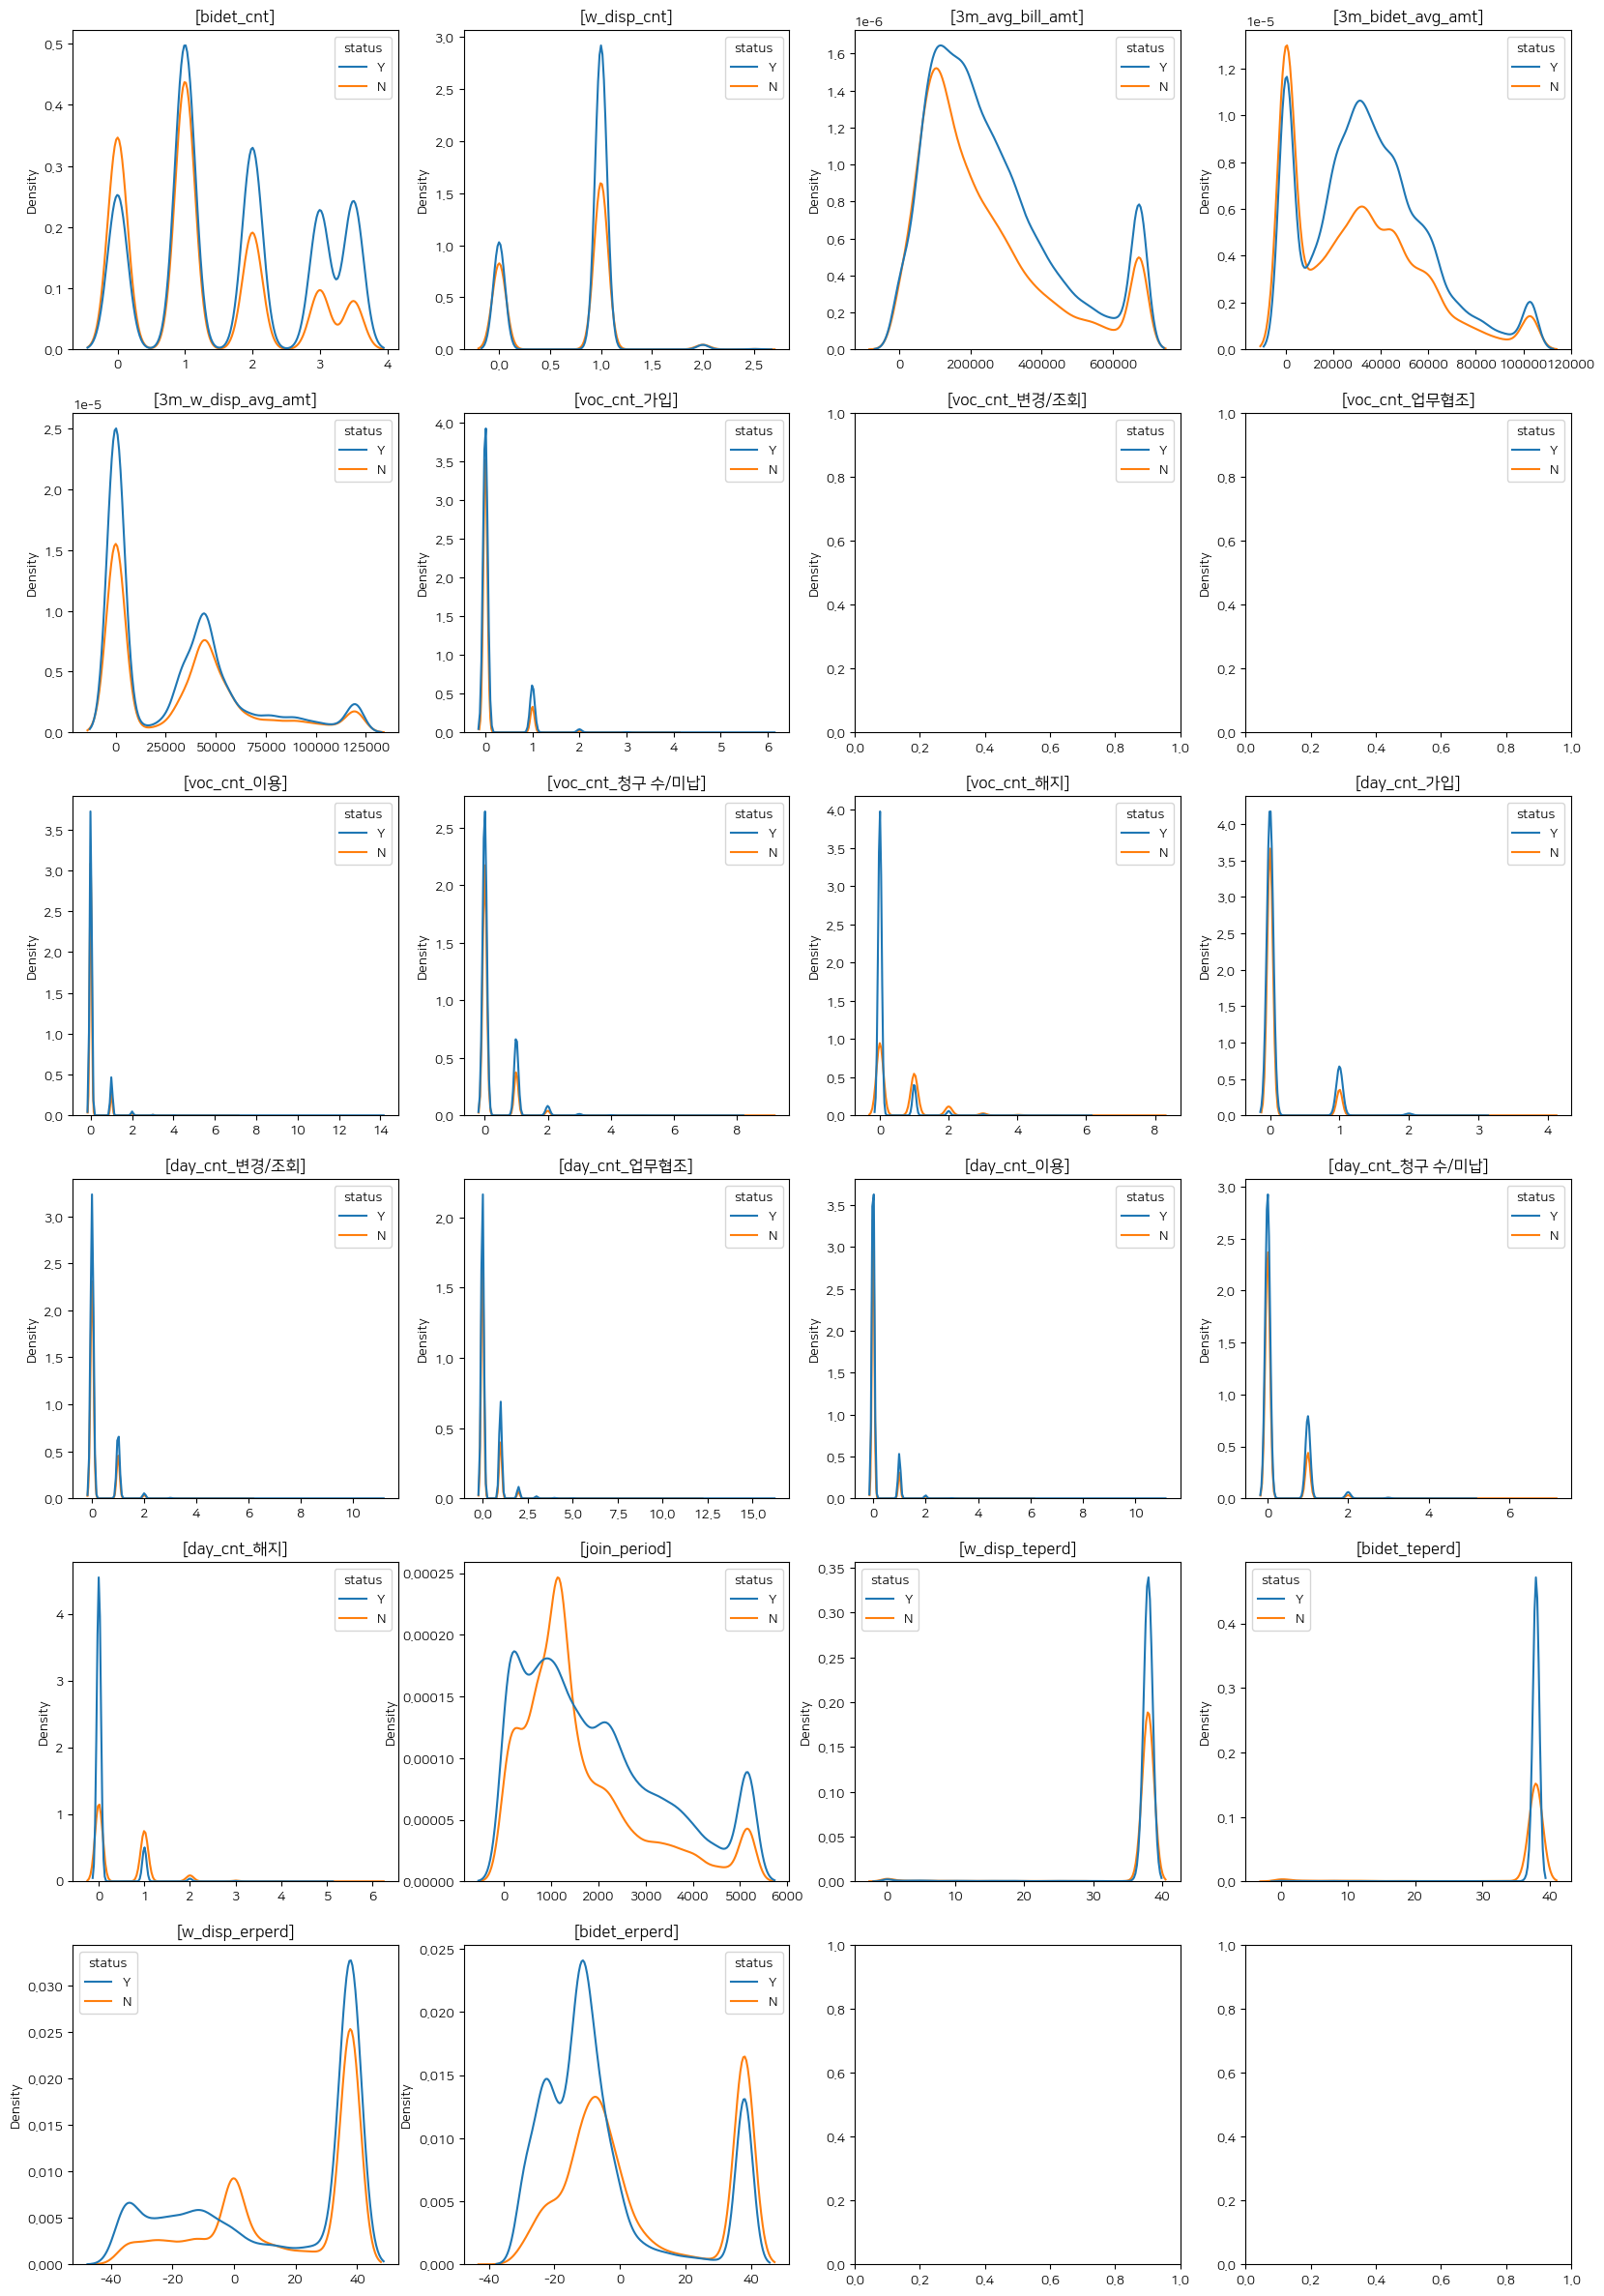

In [71]:
# 앞서 만든 함수로 수치형 칼럼에 대해 커널밀도추정그래프(kdeplot) 그리기
make_kdeplot(train_data_del_outlier,num_cols,'status')

### 3) 포인트그래프(pointplot)

In [72]:
# 수치형 칼럼에 대해서 포인트그래프를 그리는 함수 생성하기
def make_pointplot(df,num_cols,label):       
    num=len(num_cols)
    col_cnt=4
    graph_size=5
    print("대상 칼럼수:", num)
    
    # 그려야할 전체 그래프의 크기 정하기
    plt.rcParams['figure.figsize']=(col_cnt*graph_size,math.ceil(num/col_cnt)*graph_size) 
    
    # 그려야할 각각의 그래프의 위치 정하기   
    fig, ax = plt.subplots(ncols=col_cnt,nrows=math.ceil(num/col_cnt)) 
    i=0          
    for column in tqdm(num_cols):
        sns.pointplot(data=df,y=column,x=label,ax=ax[int(i/col_cnt)][i%col_cnt])    
        ax[int(i/col_cnt)][i%col_cnt].set_title('['+column+']')  # 칼럼명을 제목으로 붙이기
        ax[int(i/col_cnt)][i%col_cnt].set_ylabel('')             # y축의 이름을 공란으로 하기
        i=i+1

    plt.show()
    plt.rcParams['figure.figsize']=(7,7)

대상 칼럼수: 22


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:09<00:00,  2.37it/s]


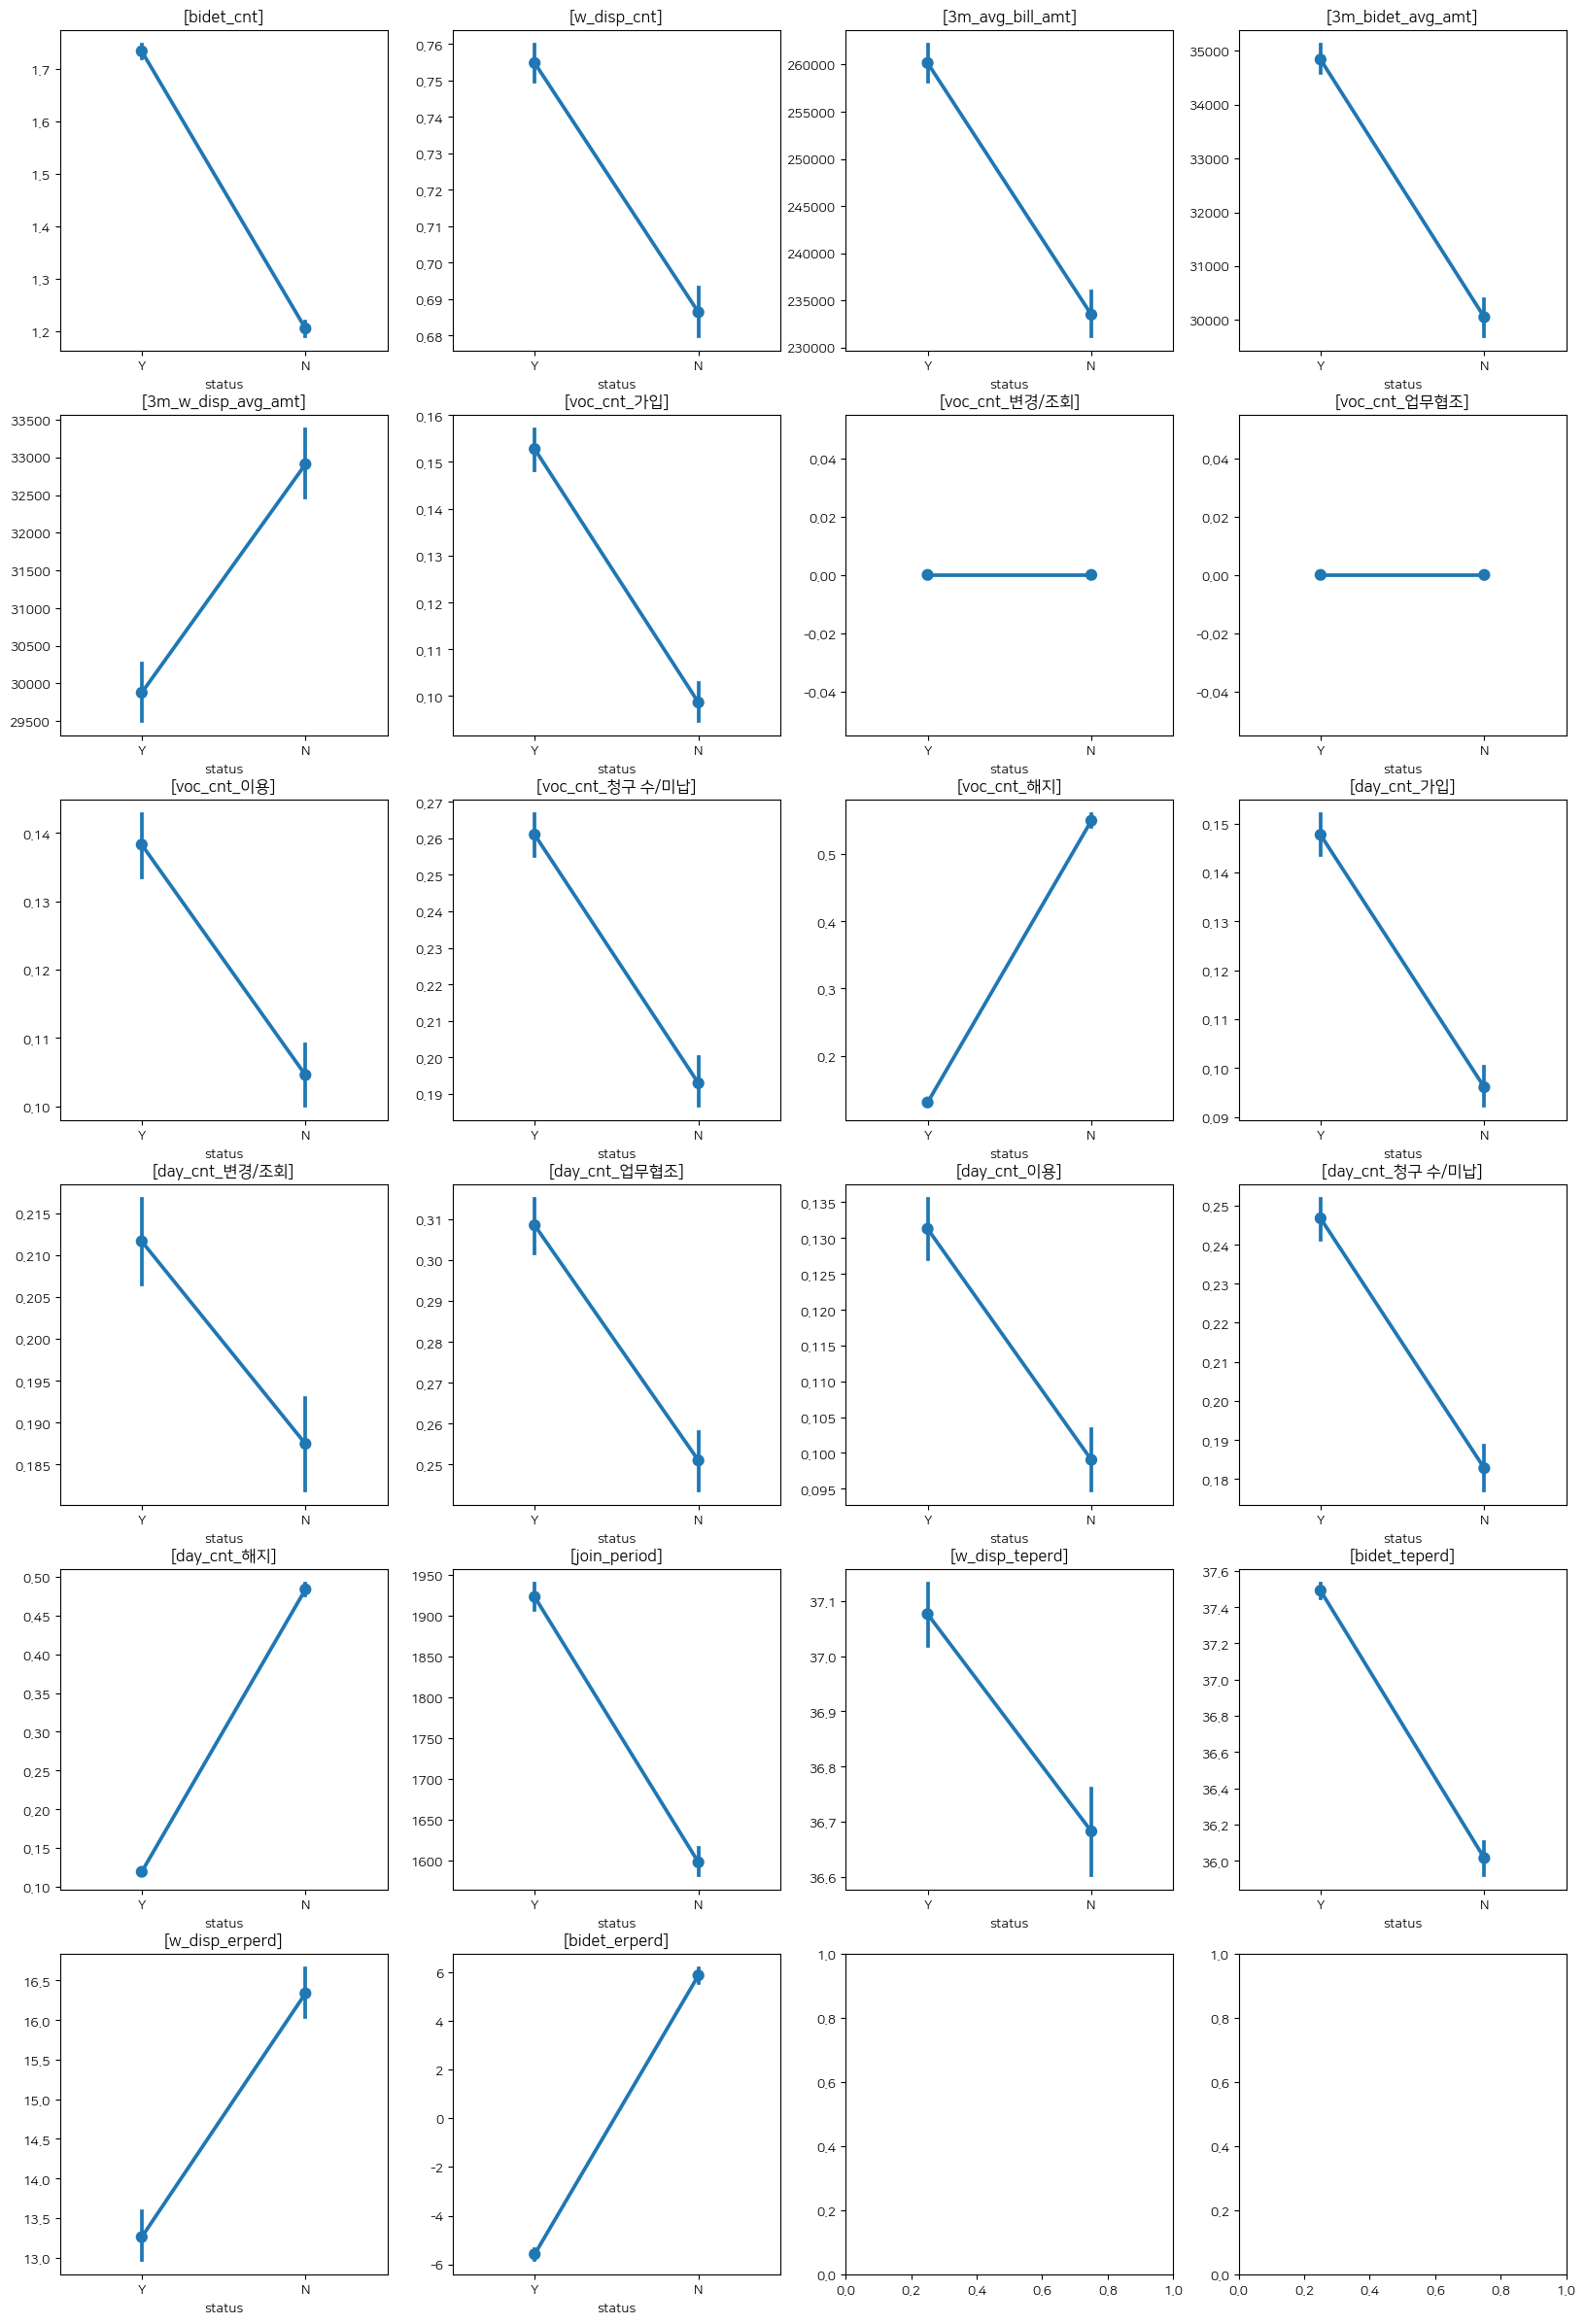

In [73]:
# 앞서 만든 함수로 수치형 칼럼에 대해 포인트그래프 그리기
make_pointplot(train_data_del_outlier,num_cols,'status')

## 5. 범주형 데이터 분석하기

### 1) 빈도 그래프(countplot)

In [74]:
# 범주형 칼럼 리스트 생성하기
obj_cols = train_data.select_dtypes('O').columns
obj_cols

Index(['status', 'sex_cd', 'w_disp_yn', 'bidet_yn', 'comb_prod_yn',
       'bidet_comb_yn', 'w_disp_comb_yn', 'npay_yn'],
      dtype='object')

In [75]:
# 범주형 칼럼에 대해서 빈도그래프를 그리는 함수 생성하기
def make_countplot(df,obj_cols,label):    
    num=len(obj_cols)
    col_cnt=4
    graph_size=5
    print("대상 칼럼수:", num)
    
    # 그려야할 전체 그래프의 크기를 정하기 
    plt.rcParams['figure.figsize']=(col_cnt*graph_size,math.ceil(num/col_cnt)*graph_size) 
    
    # 그려야할 각각의 그래프의 위치 정하기
    fig, ax = plt.subplots(ncols=col_cnt,nrows=math.ceil(num/col_cnt)) 
    i=0    
    for column in obj_cols:
        sns.countplot(data=df,x=column,hue=label,ax=ax[int(i/col_cnt)][i%col_cnt])
        ax[int(i/col_cnt)][i%col_cnt].set_title('['+column+']') # 칼럼명을 제목으로 붙이기
        ax[int(i/col_cnt)][i%col_cnt].set_xlabel('')            # x축의 이름을 공란으로 처리하기
        i=i+1
    plt.show()
    plt.rcParams['figure.figsize']=(7,7)

대상 칼럼수: 8


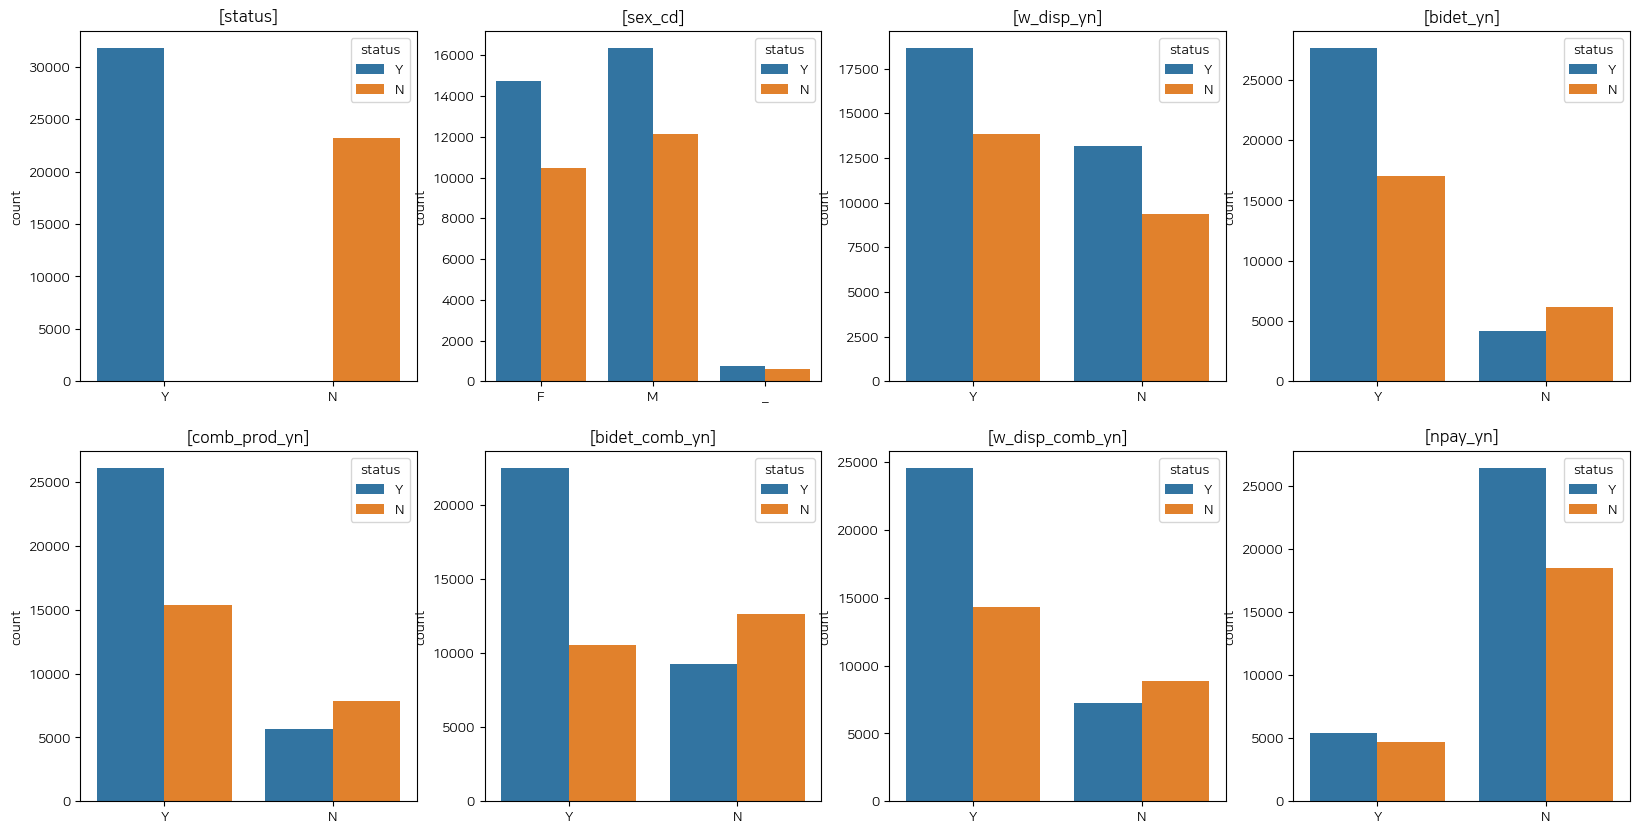

In [76]:
make_countplot(train_data,obj_cols,'status')

# SECTION 04. AI모델링을 위한 전처리(Preprocessing)하기

## 1. 표준화와 정규화하기

In [77]:
# 수치형 칼럼 리스트를 만들기
numbers=['int64','float64']
num_cols = train_data.select_dtypes(numbers).columns
num_cols

Index(['bidet_cnt', 'w_disp_cnt', '3m_avg_bill_amt', '3m_bidet_avg_amt',
       '3m_w_disp_avg_amt', 'voc_cnt_가입', 'voc_cnt_변경/조회', 'voc_cnt_업무협조',
       'voc_cnt_이용', 'voc_cnt_청구 수/미납', 'voc_cnt_해지', 'day_cnt_가입',
       'day_cnt_변경/조회', 'day_cnt_업무협조', 'day_cnt_이용', 'day_cnt_청구 수/미납',
       'day_cnt_해지', 'join_period', 'w_disp_teperd', 'bidet_teperd',
       'w_disp_erperd', 'bidet_erperd'],
      dtype='object')

### 1) 표준화(standardization)하기

In [78]:
# 필요한 패키지 불러오기
from sklearn.preprocessing import StandardScaler

# 표준화를 적용하기 위해 standardScaler 생성하기
standardScaler = StandardScaler()

# 수치형 칼럼에 표준화 적용하기
train_data[num_cols] = standardScaler.fit_transform(train_data[num_cols])

# 수치형 칼럼에 표준화 적용하기 - train_data와 동일하게 적용하기 위해 fit없이 transform만 적용하기
test_data[num_cols]=standardScaler.transform(test_data[num_cols])

# 표준화 결과 확인하기
train_data[num_cols].describe()

,bidet_cnt,w_disp_cnt,3m_avg_bill_amt,3m_bidet_avg_amt,3m_w_disp_avg_amt,voc_cnt_가입,voc_cnt_변경/조회,voc_cnt_업무협조,voc_cnt_이용,voc_cnt_청구 수/미납,...,day_cnt_변경/조회,day_cnt_업무협조,day_cnt_이용,day_cnt_청구 수/미납,day_cnt_해지,join_period,w_disp_teperd,bidet_teperd,w_disp_erperd,bidet_erperd
count,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,...,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04,5.500000e+04
mean,-3.670290e-16,-5.261216e-16,9.315780e-18,7.218710e-16,-5.162593e-16,2.751569e-15,9.212610e-16,1.437206e-15,9.390408e-16,1.160930e-16,...,9.397493e-16,2.250713e-15,-9.895014e-16,-8.402117e-16,-2.784633e-15,-2.908885e-17,-1.274769e-15,-5.519827e-17,-9.112307e-17,-8.641068e-18
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,...,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-3.906204e-02,-6.483763e-01,-3.565643e-01,-8.977446e-01,-1.049899e-01,-3.548972e-01,-3.884408e-01,-3.752426e-01,-3.110110e-01,-4.552106e-01,...,-4.497047e-01,-4.898579e-01,-3.244886e-01,-4.727622e-01,-5.261423e-01,-1.149802e+00,-6.558596e+00,-6.458014e+00,-1.940832e+00,-1.500677e+00
25%,-2.401956e-02,-6.483763e-01,-2.134368e-01,-6.026667e-01,-1.049899e-01,-3.548972e-01,-3.884408e-01,-3.752426e-01,-3.110110e-01,-4.552106e-01,...,-4.497047e-01,-4.898579e-01,-3.244886e-01,-4.727622e-01,-5.261423e-01,-6.869425e-01,1.936772e-01,1.982746e-01,-8.867821e-01,-6.431238e-01
50%,-2.401956e-02,2.310707e-01,-1.084393e-01,-8.702069e-02,-2.262107e-02,-3.548972e-01,-3.884408e-01,-3.752426e-01,-3.110110e-01,-4.552106e-01,...,-4.497047e-01,-4.898579e-01,-3.244886e-01,-4.727622e-01,-5.261423e-01,-3.100954e-01,1.936772e-01,1.982746e-01,6.942933e-01,-3.271832e-01
75%,-8.977078e-03,2.310707e-01,5.265599e-02,3.555961e-01,1.585976e-02,-3.548972e-01,-3.884408e-01,-3.752426e-01,-3.110110e-01,-4.552106e-01,...,-4.497047e-01,-4.898579e-01,-3.244886e-01,-4.727622e-01,-5.261423e-01,4.077088e-01,1.936772e-01,1.982746e-01,8.825166e-01,3.498324e-01
max,7.633160e+01,1.092825e+02,2.122352e+02,7.978902e+01,1.531834e+02,1.603414e+01,1.063694e+02,1.147525e+02,3.478769e+01,1.718309e+01,...,2.410769e+01,2.708659e+01,3.000389e+01,1.458585e+01,1.104128e+01,4.045614e+00,1.936772e-01,1.982746e-01,8.825166e-01,1.748998e+00


### 2) 정규화(Normalization)하기

In [79]:
# 필요한 패키지 불러오기
from sklearn.preprocessing import MinMaxScaler

# 표준화를 적용하기 위해 MinMaxScaler 생성하기
minMaxScaler = MinMaxScaler()

# 수치형 칼럼에 정규화 적용하기
train_data[num_cols] = minMaxScaler.fit_transform(train_data[num_cols])

# 수치형 칼럼에 정규화 적용하기 - train_data와 동일하게 적용하기 위해 fit없이 transform만 적용
test_data[num_cols]=minMaxScaler.transform(test_data[num_cols])

# 정규화 결과 확인하기
train_data[num_cols].describe()

,bidet_cnt,w_disp_cnt,3m_avg_bill_amt,3m_bidet_avg_amt,3m_w_disp_avg_amt,voc_cnt_가입,voc_cnt_변경/조회,voc_cnt_업무협조,voc_cnt_이용,voc_cnt_청구 수/미납,...,day_cnt_변경/조회,day_cnt_업무협조,day_cnt_이용,day_cnt_청구 수/미납,day_cnt_해지,join_period,w_disp_teperd,bidet_teperd,w_disp_erperd,bidet_erperd
count,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,...,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000,55000.000000
mean,0.000511,0.005898,0.001677,0.011126,0.000685,0.021655,0.003639,0.003259,0.008861,0.025808,...,0.018312,0.017764,0.010699,0.031395,0.045485,0.221311,0.971317,0.970212,0.687422,0.461793
std,0.013094,0.009097,0.004704,0.012394,0.006524,0.061017,0.009367,0.008686,0.028491,0.056695,...,0.040721,0.036263,0.032973,0.066408,0.086450,0.192479,0.148100,0.150235,0.354193,0.307726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000197,0.000000,0.000673,0.003657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.089090,1.000000,1.000000,0.373333,0.263889
50%,0.000197,0.008000,0.001167,0.010048,0.000537,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.161625,1.000000,1.000000,0.933333,0.361111
75%,0.000394,0.008000,0.001925,0.015533,0.000788,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.299786,1.000000,1.000000,1.000000,0.569444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. 레이블 인코딩(Lable Encoding)하기

In [80]:
# 레이블 인코딩 대상 칼럼 찾기
le_columns= train_data.select_dtypes('O').columns
le_columns

Index(['status', 'sex_cd', 'w_disp_yn', 'bidet_yn', 'comb_prod_yn',
       'bidet_comb_yn', 'w_disp_comb_yn', 'npay_yn'],
      dtype='object')

In [81]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행하기
le = LabelEncoder()

for column in le_columns:
    le.fit(train_data[column])
    train_data[column]=le.transform(train_data[column])
    
    # train_data에 없는 label이 test_data에 있을 수 있으므로 아래 코드가 필요하며, test_data는 fit 없이 transform만 해야함
    for label in np.unique(test_data[column]):
        if label not in le.classes_: # unseen label 데이터인 경우( )
            le.classes_ = np.append(le.classes_, label) # 미처리 시 ValueError발생
    test_data[column]=le.transform(test_data[column])        


In [82]:
# 변환 값 확인하기:  N이 0, Y가 1로 변경됨
le.classes_

array(['N', 'Y'], dtype=object)

In [83]:
train_data.head()

,status,bidet_cnt,w_disp_cnt,sex_cd,w_disp_yn,bidet_yn,comb_prod_yn,bidet_comb_yn,w_disp_comb_yn,npay_yn,...,day_cnt_변경/조회,day_cnt_업무협조,day_cnt_이용,day_cnt_청구 수/미납,day_cnt_해지,join_period,w_disp_teperd,bidet_teperd,w_disp_erperd,bidet_erperd
0,1,0.000197,0.000,0,1,1,1,1,1,1,...,0.0,0.0000,0.0,0.142857,0.000000,0.146260,1.0,1.0,0.373333,0.305556
1,0,0.000394,0.000,1,0,1,0,0,0,0,...,0.0,0.0000,0.0,0.000000,0.166667,0.293354,1.0,1.0,1.000000,0.388889
2,0,0.000197,0.008,1,1,0,1,1,1,0,...,0.0,0.0625,0.0,0.000000,0.000000,0.134231,1.0,1.0,0.493333,1.000000
3,1,0.000788,0.008,0,1,1,1,1,1,1,...,0.0,0.0000,0.0,0.000000,0.000000,0.474988,1.0,1.0,0.973333,0.319444
4,0,0.000197,0.008,0,1,1,1,1,1,0,...,0.0,0.0000,0.0,0.000000,0.166667,0.207837,1.0,1.0,0.133333,0.166667


In [84]:
# 유지를 예측하는 것이 아니라 해지를 예측해야 하므로 값을 반전시키기(0 >1 , 1> 0)
train_data['status']=train_data['status'].apply(lambda x:1 if x==0 else 0)
test_data['status']=test_data['status'].apply(lambda x:1 if x==0 else 0)

In [85]:
train_data.head()

,status,bidet_cnt,w_disp_cnt,sex_cd,w_disp_yn,bidet_yn,comb_prod_yn,bidet_comb_yn,w_disp_comb_yn,npay_yn,...,day_cnt_변경/조회,day_cnt_업무협조,day_cnt_이용,day_cnt_청구 수/미납,day_cnt_해지,join_period,w_disp_teperd,bidet_teperd,w_disp_erperd,bidet_erperd
0,0,0.000197,0.000,0,1,1,1,1,1,1,...,0.0,0.0000,0.0,0.142857,0.000000,0.146260,1.0,1.0,0.373333,0.305556
1,1,0.000394,0.000,1,0,1,0,0,0,0,...,0.0,0.0000,0.0,0.000000,0.166667,0.293354,1.0,1.0,1.000000,0.388889
2,1,0.000197,0.008,1,1,0,1,1,1,0,...,0.0,0.0625,0.0,0.000000,0.000000,0.134231,1.0,1.0,0.493333,1.000000
3,0,0.000788,0.008,0,1,1,1,1,1,1,...,0.0,0.0000,0.0,0.000000,0.000000,0.474988,1.0,1.0,0.973333,0.319444
4,1,0.000197,0.008,0,1,1,1,1,1,0,...,0.0,0.0000,0.0,0.000000,0.166667,0.207837,1.0,1.0,0.133333,0.166667


## 3. 원핫 인코딩(One Hot Encoding)하기

In [86]:
# 레이블 인코딩한 칼럼에 대해 범주를 확인하기
for column in le_columns:
    print(train_data[column].value_counts())

0    31806
1    23194
Name: status, dtype: int64
1    28486
0    25178
2     1336
Name: sex_cd, dtype: int64
1    32474
0    22526
Name: w_disp_yn, dtype: int64
1    44657
0    10343
Name: bidet_yn, dtype: int64
1    41462
0    13538
Name: comb_prod_yn, dtype: int64
1    33075
0    21925
Name: bidet_comb_yn, dtype: int64
1    38924
0    16076
Name: w_disp_comb_yn, dtype: int64
0    44920
1    10080
Name: npay_yn, dtype: int64


In [87]:
# 원핫 인코딩 대상 칼럼 지정하기
oh_columns=['sex_cd']

# 원핫 인코딩을 위한 패키지 불러오기
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder를 객체로 생성한 후, fit( ) 과 transform( ) 으로 원핫 인코딩 수행하기 
enc = OneHotEncoder(sparse=False,drop='if_binary')
train_onehot=enc.fit_transform(train_data[oh_columns])
test_onehot=enc.transform(test_data[oh_columns])

train_onehot

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [88]:
# pd.concat함수를 이용하여 train_data에 원핫 인코딩한 데이터를 붙여주고, 기존 칼럼은 삭제하기
train_data_OH=pd.concat([train_data,pd.DataFrame(train_onehot,columns=enc.get_feature_names(oh_columns))],axis=1)
test_data_OH=pd.concat([test_data,pd.DataFrame(test_onehot,columns=enc.get_feature_names(oh_columns))],axis=1)

# 만약, sklearn 버젼이 차이로 get_feature_names 에러 발생시 : 위의 코드는 주석처리하고 아래 2줄 주석 해제하고 수행
# train_data_OH=pd.concat([train_data,pd.DataFrame(train_onehot,columns=enc.get_feature_names_out(oh_columns))],axis=1)
# test_data_OH=pd.concat([test_data,pd.DataFrame(test_onehot,columns=enc.get_feature_names_out(oh_columns))],axis=1)

train_data_OH.drop(oh_columns,axis=1,inplace=True)
test_data_OH.drop(oh_columns,axis=1,inplace=True)

train_data=train_data_OH
test_data=test_data_OH

train_data

,status,bidet_cnt,w_disp_cnt,w_disp_yn,bidet_yn,comb_prod_yn,bidet_comb_yn,w_disp_comb_yn,npay_yn,3m_avg_bill_amt,...,day_cnt_청구 수/미납,day_cnt_해지,join_period,w_disp_teperd,bidet_teperd,w_disp_erperd,bidet_erperd,sex_cd_0,sex_cd_1,sex_cd_2
0,0,0.000197,0.000,1,1,1,1,1,1,0.002176,...,0.142857,0.000000,0.146260,1.0,1.000000,0.373333,0.305556,1.0,0.0,0.0
1,1,0.000394,0.000,0,1,0,0,0,0,0.000672,...,0.000000,0.166667,0.293354,1.0,1.000000,1.000000,0.388889,0.0,1.0,0.0
2,1,0.000197,0.008,1,0,1,1,1,0,0.000561,...,0.000000,0.000000,0.134231,1.0,1.000000,0.493333,1.000000,0.0,1.0,0.0
3,0,0.000788,0.008,1,1,1,1,1,1,0.001271,...,0.000000,0.000000,0.474988,1.0,1.000000,0.973333,0.319444,1.0,0.0,0.0
4,1,0.000197,0.008,1,1,1,1,1,0,0.001780,...,0.000000,0.166667,0.207837,1.0,1.000000,0.133333,0.166667,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,1,0.000000,0.008,1,0,1,0,1,1,0.000771,...,0.000000,0.000000,0.650667,1.0,1.000000,0.920000,1.000000,0.0,1.0,0.0
54996,0,0.000000,0.008,1,0,1,0,1,0,0.000611,...,0.000000,0.166667,0.331467,1.0,0.973684,0.506667,1.000000,1.0,0.0,0.0
54997,0,0.000788,0.008,0,1,0,0,0,0,0.000494,...,0.000000,0.000000,0.049905,1.0,1.000000,1.000000,0.222222,1.0,0.0,0.0
54998,0,0.000591,0.008,0,1,0,0,0,0,0.000695,...,0.142857,0.166667,0.045855,1.0,1.000000,1.000000,0.208333,0.0,1.0,0.0


## 4. 다중공선성 제거하기

### 1) 변수 간 상관관계 시각화와 상관계수 0.9이상 변수 확인하기

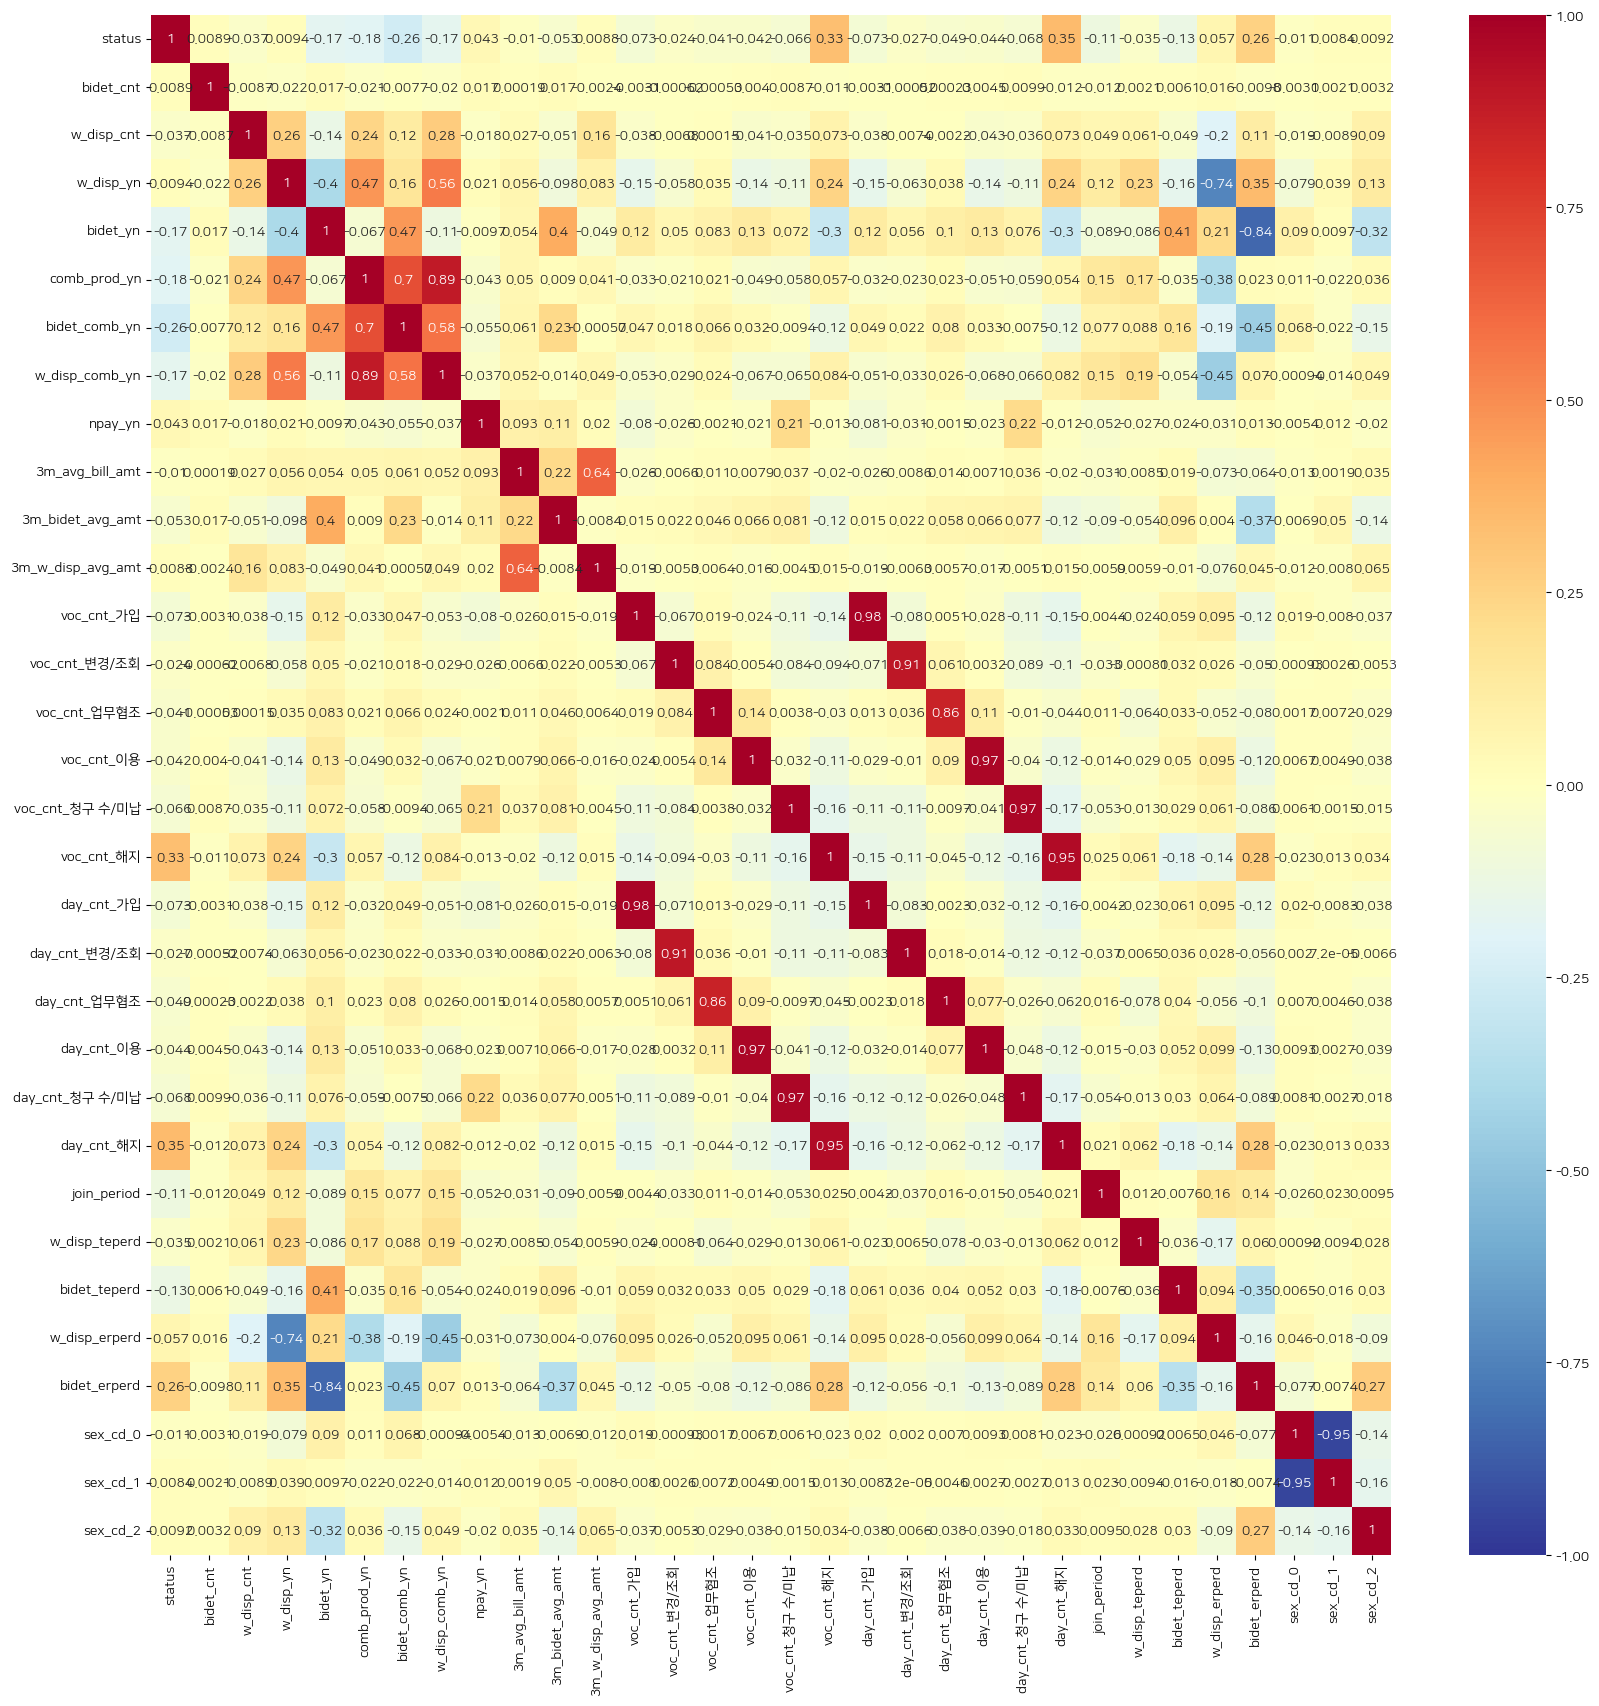

In [89]:
# 그래프 사이즈를 크게 설정하기
plt.rcParams["figure.figsize"]=(20,20)

# train_data의 상관관계를 히트맵 그리기
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlBu_r',vmin=-1, vmax=1)

# 그래프 사이즈 원래대로 바꾸기
plt.rcParams["figure.figsize"]=(5,5)

In [90]:
check=[]
mcol_linearity=[]

train_corr=train_data.corr() #모든 변수의 상관관계 계산하기

# 행, 열 간의 상관관계를 계산하므로 for문 두 번 중첩해서 돌리기
for idx in train_corr.index:
    
    # 중복 계산에서 제외하기 위해 반복문을 수행할때 check 리스트에 넣기
    check.append(idx)
    for column in train_corr.columns:
        
        # train_corr가 대각선 방향으로 대칭이므로 두 번 계산을 피하기
        if column not in check:
            if (train_corr.loc[idx,column]>=0.9 and train_corr.loc[idx,column]<1) or (train_corr.loc[idx,column]<=-0.9 and train_corr.loc[idx,column]>-1):
                mcol_linearity.append([idx,column])        

mcol_linearity

[['voc_cnt_가입', 'day_cnt_가입'],
 ['voc_cnt_변경/조회', 'day_cnt_변경/조회'],
 ['voc_cnt_이용', 'day_cnt_이용'],
 ['voc_cnt_청구 수/미납', 'day_cnt_청구 수/미납'],
 ['voc_cnt_해지', 'day_cnt_해지'],
 ['sex_cd_0', 'sex_cd_1']]

### 2) VIF(Variance Inflation Factor, 분산팽창계수) 확인하기

In [91]:
# VIF를 확인하기 위한 패키지 불러오기
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF계산 결과를 데이터프레임에 담기
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(train_data.values, i) for i in tqdm(range(train_data.shape[1]))]
vif['Feature'] = train_data.columns

# VIF값 순서대로 내림차순 정렬하기
vif = vif.sort_values(by="VIF_Factor", ascending=False).reset_index().drop(columns='index')
vif

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:02<00:00, 13.51it/s]


,VIF_Factor,Feature
0,80.575735,sex_cd_1
1,71.338545,sex_cd_0
2,30.152586,day_cnt_가입
3,29.990095,voc_cnt_가입
4,19.843187,voc_cnt_이용
5,19.705031,day_cnt_이용
6,17.886209,day_cnt_청구 수/미납
7,17.683989,voc_cnt_청구 수/미납
8,10.156465,day_cnt_해지
9,9.917503,voc_cnt_해지


### 3) 다중공선성이 발생하는 변수 선택 및 삭제하기

In [92]:
del_cols=['sex_cd_1','voc_cnt_가입','voc_cnt_이용','voc_cnt_청구 수/미납','voc_cnt_해지']

train_data=train_data.drop(del_cols,axis=1)
test_data=test_data.drop(del_cols,axis=1)

train_data.columns

Index(['status', 'bidet_cnt', 'w_disp_cnt', 'w_disp_yn', 'bidet_yn',
       'comb_prod_yn', 'bidet_comb_yn', 'w_disp_comb_yn', 'npay_yn',
       '3m_avg_bill_amt', '3m_bidet_avg_amt', '3m_w_disp_avg_amt',
       'voc_cnt_변경/조회', 'voc_cnt_업무협조', 'day_cnt_가입', 'day_cnt_변경/조회',
       'day_cnt_업무협조', 'day_cnt_이용', 'day_cnt_청구 수/미납', 'day_cnt_해지',
       'join_period', 'w_disp_teperd', 'bidet_teperd', 'w_disp_erperd',
       'bidet_erperd', 'sex_cd_0', 'sex_cd_2'],
      dtype='object')

# SECTION 05. 모델링과 평가하기


## 1. 데이터 분할하기

In [93]:
# train_test_split 불러오기
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_data.drop('status',1),train_data['status'],random_state=10,stratify=train_data['status'])

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((41250, 26), (13750, 26), (41250,), (13750,))

In [94]:
# test_data에서 stutus만 지우면 feature영역, staus는 label 영역이 됨
X_test = test_data.drop('status',axis=1)

Y_test = test_data['status']

X_test.shape, Y_test.shape

((5000, 26), (5000,))

## 2. 모델별 성능 그래프 그리기

In [95]:
# 성능 지표 계산을 위한 패키지 불러오기
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
    
result=pd.DataFrame([],columns=['acc','recall','precision','F1-score'])


# 파리미터 
# model_name: 모델이름(str)
# pred: 예측결과
# actual: 실제값(Y_test)
def result_view(model_name, pred, actual):
    # 정확도
    acc = round(accuracy_score(actual, pred),3)
    # 정밀도
    precision = round(precision_score(actual, pred),3)
    # 재현율
    recall = round(recall_score(actual, pred),3)
    # F1 Score
    F1 = round(f1_score(actual, pred),3)
    
    result.loc[model_name]=(acc,recall,precision,F1)
    
    result.sort_values(by='acc',inplace=True,ascending=False)
    
    print(result)

    plt.figure(figsize=(8, 8))
    for idx in result.index:
        x_values = result.columns  # x축 지점의 값들
        y_values = result.loc[idx] # y축 지점의 값들
        plt.plot(x_values, y_values)# line 그래프 그리기
        plt.annotate(text=round(result.loc[idx,'acc'],3), xy=(0,result.loc[idx,'acc']),xytext=(0,result.loc[idx,'acc']),ha='center',fontsize=13)        
        plt.annotate(text=round(result.loc[idx,'recall'],3), xy=(1,result.loc[idx,'recall']),xytext=(1,result.loc[idx,'recall']),ha='center',fontsize=13)
        plt.annotate(text=round(result.loc[idx,'precision'],3), xy=(2,result.loc[idx,'precision']),xytext=(2,result.loc[idx,'precision']),ha='center',fontsize=13,)
        plt.annotate(text=round(result.loc[idx,'F1-score'],3), xy=(3,result.loc[idx,'F1-score']),xytext=(3,result.loc[idx,'F1-score']),ha='center',fontsize=13)

    plt.legend(result.index,loc=4) # 범례의 위치
        
    plt.show()

## 3. 모델 생성하기

### 1) 로지스틱 회귀(Logistic Regression)

※도큐먼트: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### [Step 1. 라이브러리 불러오기]

In [96]:
# sklearn의 LogisticRegression 불러오기
from sklearn.linear_model import LogisticRegression

#### [Step 2. 모델 생성하기]

In [97]:
# 모델 생성하기
model_lr = LogisticRegression(random_state=21)

#### [Step 3. 모델 학습하기]

In [98]:
# 모델 학습하기
model_lr.fit(x_train,y_train)

LogisticRegression(random_state=21)

#### [Step 4. 결과 검증하기]

                       acc  recall  precision  F1-score
Logistic Regression  0.733   0.584      0.719     0.644


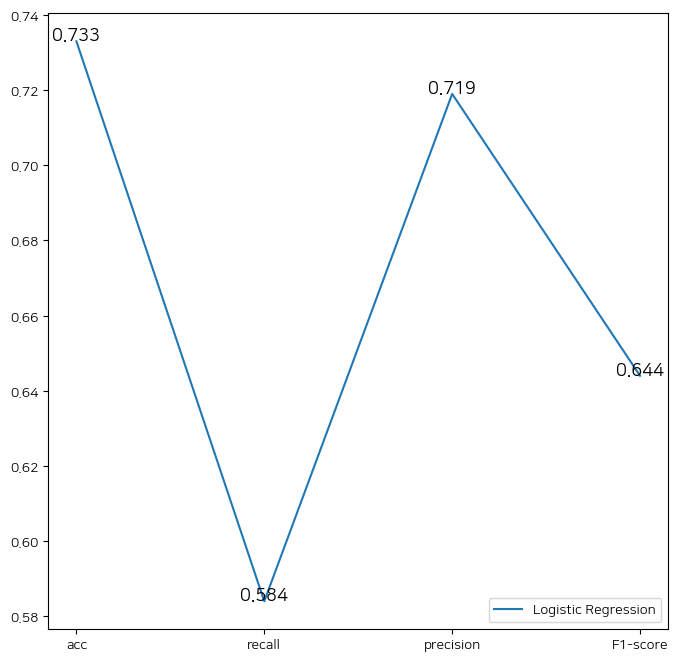

In [99]:
# 결과 예측하기
pred_lr=model_lr.predict(X_test)
result_view('Logistic Regression',pred_lr,Y_test)

### 2) KNN(K-Nearest Neighbors)

#### [Step 1. 라이브러리 불러오기]

In [100]:
# sklearn에서 KNeighborsClassifier 불러오기
from sklearn.neighbors import KNeighborsClassifier

#### [Step 2. 모델 생성하기]

In [101]:
# 모델을 생성하고, 파라미터 설정하기
model_knn= KNeighborsClassifier()

#### [Step 3. 모델 학습하기]

In [102]:
# 모델 학습하기
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

#### [Step 4. 결과 검증하기]

                       acc  recall  precision  F1-score
Logistic Regression  0.733   0.584      0.719     0.644
KNN                  0.718   0.609      0.677     0.641


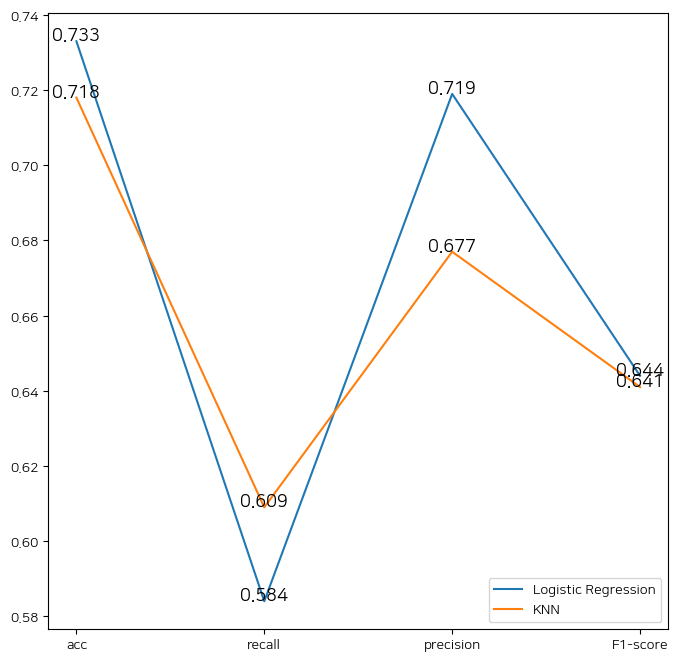

In [103]:
# 결과 예측하기
pred_knn=model_knn.predict(X_test)
result_view('KNN',pred_knn,Y_test)

### 3) SVM(Support Vector Machine)

#### [Step 1. 라이브러리 불러오기]

In [104]:
# sklearn에서 SVC 불러오기
from sklearn.svm import SVC

#### [Step 2. 모델 생성하기]

In [105]:
# 모델을 생성하고, 파라미터 설정하기
model_svm= SVC(random_state=21)

#### [Step 3. 모델 학습하기]

In [106]:
# 모델 학습하기
model_svm.fit(x_train,y_train)

SVC(random_state=21)

#### [Step 4. 결과 검증하기]

                          acc  recall  precision  F1-score
Support Vector Machine  0.734   0.603      0.710     0.652
Logistic Regression     0.733   0.584      0.719     0.644
KNN                     0.718   0.609      0.677     0.641


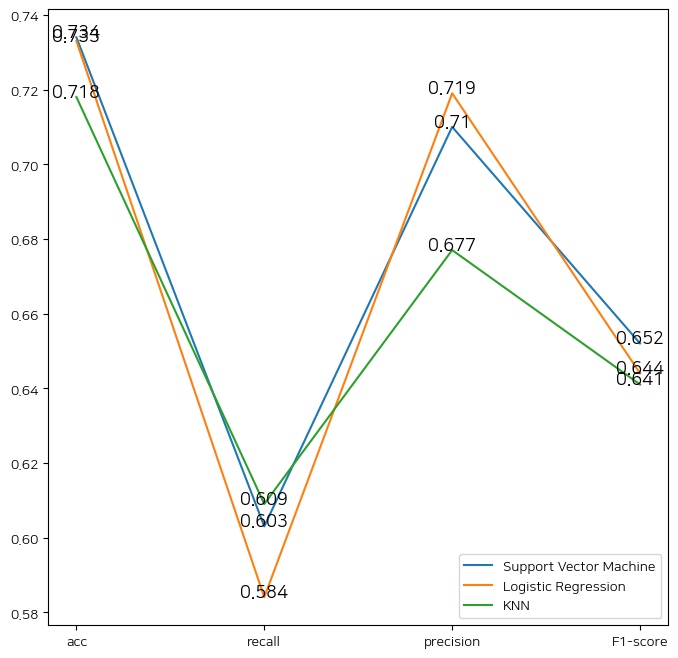

In [107]:
# 결과 예측하기 
pred_svm=model_svm.predict(X_test)
result_view('Support Vector Machine',pred_svm,Y_test)

### 4) 의사결정트리(Decision Tree)

※도큐먼트: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

#### [Step 1. 라이브러리 불러오기]

In [108]:
# sklearn의 DecisionTreeClassifier 불러오기
from sklearn.tree import DecisionTreeClassifier

#### [Step 2. 모델 생성하기]

In [109]:
# 모델을 생성하고, 파라미터 설정하기
model_dt = DecisionTreeClassifier(min_samples_split=2,
                                  min_samples_leaf=1,
                                  max_features=None,
                                  max_depth=5,
                                  max_leaf_nodes=None,
                                  random_state=21
                                 )

#### [Step 3. 모델 학습하기]

In [110]:
# 모델 학습하기
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=21)

#### [Step 4. 결과 검증하기]

In [111]:
# 결과 예측하기
pred_dt=model_dt.predict(X_test)

                          acc  recall  precision  F1-score
Decision Tree           0.746   0.624      0.724     0.670
Support Vector Machine  0.734   0.603      0.710     0.652
Logistic Regression     0.733   0.584      0.719     0.644
KNN                     0.718   0.609      0.677     0.641


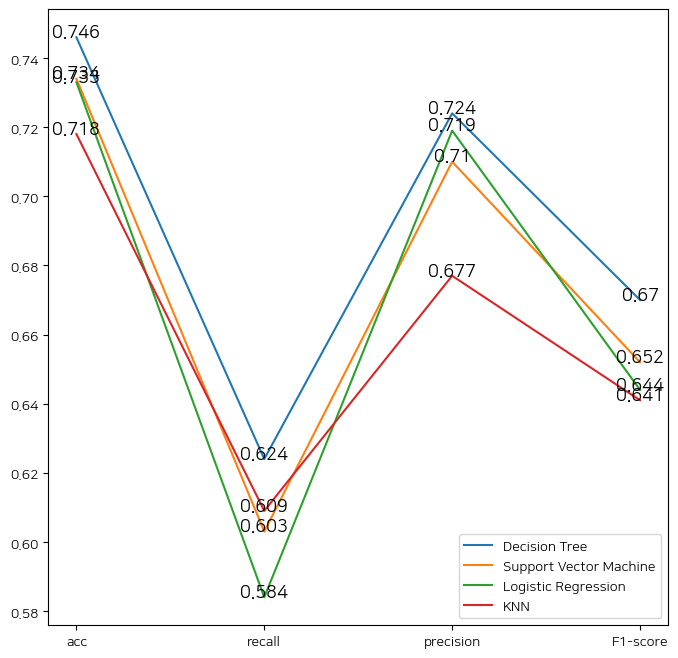

In [112]:
result_view('Decision Tree',pred_dt,Y_test)

### 5) 랜덤포레스트(Random Forest)

#### [Step 1. 라이브러리 불러오기]

In [113]:
# sklearn에서 RandomForestClassifier 불러오기
from sklearn.ensemble import RandomForestClassifier

#### [Step 2. 모델 생성하기]

In [114]:
# 모델을 생성하고, 파라미터 설정하기
model_rf= RandomForestClassifier(n_jobs=-1,n_estimators=100,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 max_features='auto',
                                 max_depth=None,
                                 max_leaf_nodes=None,
                                 random_state=21)

#### [Step 3. 모델 학습하기]

In [115]:
# 모델 학습하기
model_rf.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=21)

#### [Step 4. 결과 검증하기]

                          acc  recall  precision  F1-score
Random Forest           0.761   0.639      0.747     0.689
Decision Tree           0.746   0.624      0.724     0.670
Support Vector Machine  0.734   0.603      0.710     0.652
Logistic Regression     0.733   0.584      0.719     0.644
KNN                     0.718   0.609      0.677     0.641


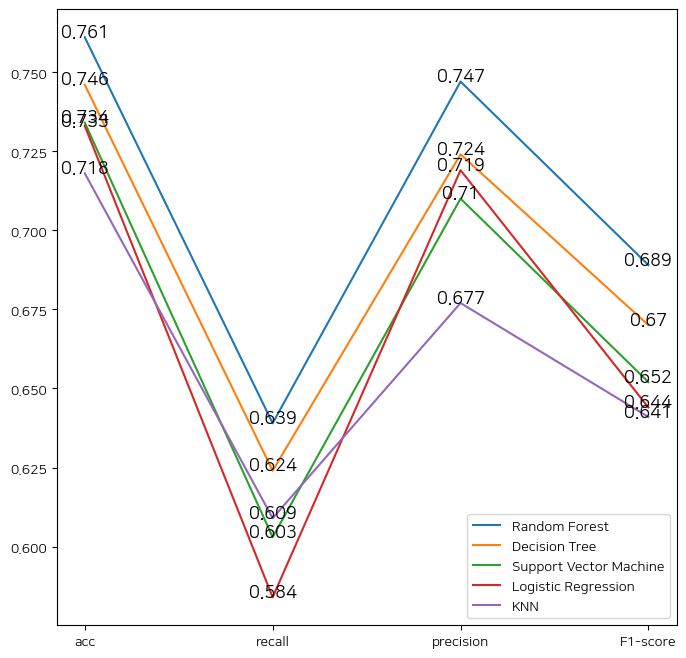

In [116]:
# 결과 예측하기 
pred_rf=model_rf.predict(X_test)
result_view('Random Forest',pred_rf,Y_test)

### 6) XGBoost

#### [Step 1. 라이브러리 불러오기]

In [117]:
# xgboost를 불러오기
import xgboost as xgb

#### [Step 2. 모델 생성하기]

In [118]:
# 모델을 생성하고, 파라미터(*학습 파라미터는 별도 설정) 설정하기
model_xgb = xgb.XGBClassifier(learning_rate=0.1,n_jobs=-1,n_estimators=500, random_state=21)

#### [Step 3. 모델 학습하기]


In [119]:
# 모델 학습하기
start=time.time()

eval_set = [(x_val, y_val)]

# logloss가 10회 개선되지 않으면 중단하도록 early stopping 설정하기
model_xgb.fit(x_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

(time.time()-start)/60

[0]	validation_0-logloss:0.66356
[1]	validation_0-logloss:0.63902
[2]	validation_0-logloss:0.61880
[3]	validation_0-logloss:0.60189
[4]	validation_0-logloss:0.58785
[5]	validation_0-logloss:0.57576
[6]	validation_0-logloss:0.56569
[7]	validation_0-logloss:0.55688
[8]	validation_0-logloss:0.54938
[9]	validation_0-logloss:0.54273
[10]	validation_0-logloss:0.53719
[11]	validation_0-logloss:0.53237
[12]	validation_0-logloss:0.52810
[13]	validation_0-logloss:0.52375
[14]	validation_0-logloss:0.52071
[15]	validation_0-logloss:0.51762
[16]	validation_0-logloss:0.51530
[17]	validation_0-logloss:0.51285
[18]	validation_0-logloss:0.51069
[19]	validation_0-logloss:0.50868
[20]	validation_0-logloss:0.50689
[21]	validation_0-logloss:0.50558
[22]	validation_0-logloss:0.50415
[23]	validation_0-logloss:0.50307
[24]	validation_0-logloss:0.50194
[25]	validation_0-logloss:0.50096
[26]	validation_0-logloss:0.49998
[27]	validation_0-logloss:0.49909
[28]	validation_0-logloss:0.49831
[29]	validation_0-loglos

0.056067927678426104

#### [Step 4. 결과 검증하기]

                          acc  recall  precision  F1-score
XGBoost                 0.763   0.635      0.755     0.690
Random Forest           0.761   0.639      0.747     0.689
Decision Tree           0.746   0.624      0.724     0.670
Support Vector Machine  0.734   0.603      0.710     0.652
Logistic Regression     0.733   0.584      0.719     0.644
KNN                     0.718   0.609      0.677     0.641


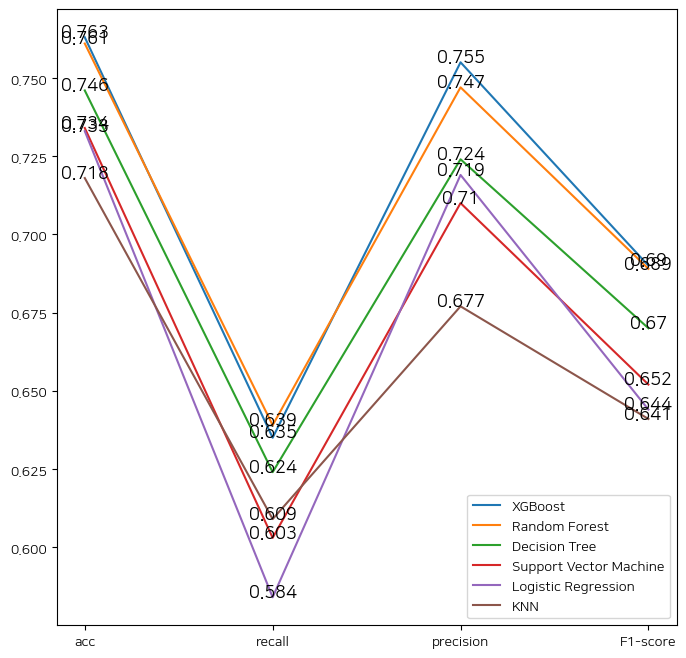

In [120]:
# 결과 예측하기
pred_xgb=model_xgb.predict(X_test)
result_view('XGBoost',pred_xgb,Y_test) 

### 7) CatBoost

#### [Step 1. 라이브러리 불러오기]

In [121]:
# catboost 불러오기
import time
start=time.time()

from catboost import CatBoostClassifier, Pool

#### [Step 2. 모델 생성하기]

In [122]:
# 모델을 생성하고, 파라미터 설정하기
cat = CatBoostClassifier(learning_rate=0.03, iterations=2000,random_state=21)

#### [Step 3. 모델 학습하기]

In [123]:
start=time.time()
# 모델 학습하기
# Pool 함수로 데이터셋 지정하기. 반드시 label을 지정해 주어야 함
train_dataset = Pool(data=x_train,label=y_train) #feature와 label 지정하기
eval_dataset = Pool(data=x_val,label=y_val) #feature와 label 지정하기

cat.fit(train_dataset, eval_set=eval_dataset,early_stopping_rounds=30)
(time.time()-start)/60

0:	learn: 0.6825266	test: 0.6824197	best: 0.6824197 (0)	total: 169ms	remaining: 5m 37s
1:	learn: 0.6730971	test: 0.6728398	best: 0.6728398 (1)	total: 183ms	remaining: 3m 2s
2:	learn: 0.6649256	test: 0.6645339	best: 0.6645339 (2)	total: 195ms	remaining: 2m 9s
3:	learn: 0.6568689	test: 0.6563148	best: 0.6563148 (3)	total: 206ms	remaining: 1m 42s
4:	learn: 0.6492707	test: 0.6486390	best: 0.6486390 (4)	total: 216ms	remaining: 1m 26s
5:	learn: 0.6412550	test: 0.6405227	best: 0.6405227 (5)	total: 224ms	remaining: 1m 14s
6:	learn: 0.6339193	test: 0.6330597	best: 0.6330597 (6)	total: 233ms	remaining: 1m 6s
7:	learn: 0.6278248	test: 0.6268817	best: 0.6268817 (7)	total: 241ms	remaining: 1m
8:	learn: 0.6218379	test: 0.6207008	best: 0.6207008 (8)	total: 250ms	remaining: 55.4s
9:	learn: 0.6162434	test: 0.6150369	best: 0.6150369 (9)	total: 259ms	remaining: 51.5s
10:	learn: 0.6107489	test: 0.6093934	best: 0.6093934 (10)	total: 268ms	remaining: 48.4s
11:	learn: 0.6052808	test: 0.6038586	best: 0.603858

94:	learn: 0.5110939	test: 0.5102674	best: 0.5102674 (94)	total: 983ms	remaining: 19.7s
95:	learn: 0.5107788	test: 0.5099899	best: 0.5099899 (95)	total: 992ms	remaining: 19.7s
96:	learn: 0.5105664	test: 0.5098275	best: 0.5098275 (96)	total: 1s	remaining: 19.6s
97:	learn: 0.5102852	test: 0.5095723	best: 0.5095723 (97)	total: 1.01s	remaining: 19.6s
98:	learn: 0.5100977	test: 0.5094116	best: 0.5094116 (98)	total: 1.02s	remaining: 19.5s
99:	learn: 0.5098719	test: 0.5092065	best: 0.5092065 (99)	total: 1.02s	remaining: 19.5s
100:	learn: 0.5096814	test: 0.5090670	best: 0.5090670 (100)	total: 1.03s	remaining: 19.4s
101:	learn: 0.5094737	test: 0.5089145	best: 0.5089145 (101)	total: 1.04s	remaining: 19.3s
102:	learn: 0.5093309	test: 0.5087590	best: 0.5087590 (102)	total: 1.05s	remaining: 19.3s
103:	learn: 0.5091068	test: 0.5085751	best: 0.5085751 (103)	total: 1.05s	remaining: 19.2s
104:	learn: 0.5089322	test: 0.5084174	best: 0.5084174 (104)	total: 1.06s	remaining: 19.2s
105:	learn: 0.5086865	tes

193:	learn: 0.4969959	test: 0.4991292	best: 0.4991292 (193)	total: 1.81s	remaining: 16.9s
194:	learn: 0.4969167	test: 0.4990983	best: 0.4990983 (194)	total: 1.82s	remaining: 16.9s
195:	learn: 0.4968117	test: 0.4990232	best: 0.4990232 (195)	total: 1.83s	remaining: 16.9s
196:	learn: 0.4966757	test: 0.4989339	best: 0.4989339 (196)	total: 1.84s	remaining: 16.9s
197:	learn: 0.4965634	test: 0.4988616	best: 0.4988616 (197)	total: 1.85s	remaining: 16.8s
198:	learn: 0.4964830	test: 0.4988122	best: 0.4988122 (198)	total: 1.86s	remaining: 16.8s
199:	learn: 0.4964468	test: 0.4987896	best: 0.4987896 (199)	total: 1.86s	remaining: 16.8s
200:	learn: 0.4962946	test: 0.4986780	best: 0.4986780 (200)	total: 1.88s	remaining: 16.8s
201:	learn: 0.4961344	test: 0.4985722	best: 0.4985722 (201)	total: 1.89s	remaining: 16.8s
202:	learn: 0.4961028	test: 0.4985515	best: 0.4985515 (202)	total: 1.89s	remaining: 16.8s
203:	learn: 0.4960507	test: 0.4985291	best: 0.4985291 (203)	total: 1.9s	remaining: 16.7s
204:	learn:

297:	learn: 0.4885219	test: 0.4938737	best: 0.4938737 (297)	total: 2.67s	remaining: 15.2s
298:	learn: 0.4884440	test: 0.4938327	best: 0.4938327 (298)	total: 2.67s	remaining: 15.2s
299:	learn: 0.4883235	test: 0.4937741	best: 0.4937741 (299)	total: 2.68s	remaining: 15.2s
300:	learn: 0.4882800	test: 0.4937538	best: 0.4937538 (300)	total: 2.69s	remaining: 15.2s
301:	learn: 0.4882377	test: 0.4937384	best: 0.4937384 (301)	total: 2.7s	remaining: 15.2s
302:	learn: 0.4881347	test: 0.4936910	best: 0.4936910 (302)	total: 2.71s	remaining: 15.2s
303:	learn: 0.4880867	test: 0.4936737	best: 0.4936737 (303)	total: 2.72s	remaining: 15.2s
304:	learn: 0.4880378	test: 0.4936431	best: 0.4936431 (304)	total: 2.73s	remaining: 15.1s
305:	learn: 0.4879634	test: 0.4935881	best: 0.4935881 (305)	total: 2.73s	remaining: 15.1s
306:	learn: 0.4879179	test: 0.4935526	best: 0.4935526 (306)	total: 2.74s	remaining: 15.1s
307:	learn: 0.4878590	test: 0.4935188	best: 0.4935188 (307)	total: 2.75s	remaining: 15.1s
308:	learn:

395:	learn: 0.4815523	test: 0.4901270	best: 0.4901270 (395)	total: 3.5s	remaining: 14.2s
396:	learn: 0.4815007	test: 0.4900997	best: 0.4900997 (396)	total: 3.51s	remaining: 14.2s
397:	learn: 0.4814413	test: 0.4900775	best: 0.4900775 (397)	total: 3.52s	remaining: 14.2s
398:	learn: 0.4813861	test: 0.4900521	best: 0.4900521 (398)	total: 3.53s	remaining: 14.2s
399:	learn: 0.4812760	test: 0.4899655	best: 0.4899655 (399)	total: 3.54s	remaining: 14.1s
400:	learn: 0.4811742	test: 0.4899034	best: 0.4899034 (400)	total: 3.54s	remaining: 14.1s
401:	learn: 0.4811123	test: 0.4898993	best: 0.4898993 (401)	total: 3.55s	remaining: 14.1s
402:	learn: 0.4810332	test: 0.4898703	best: 0.4898703 (402)	total: 3.56s	remaining: 14.1s
403:	learn: 0.4809506	test: 0.4898335	best: 0.4898335 (403)	total: 3.57s	remaining: 14.1s
404:	learn: 0.4809060	test: 0.4898089	best: 0.4898089 (404)	total: 3.58s	remaining: 14.1s
405:	learn: 0.4808568	test: 0.4898059	best: 0.4898059 (405)	total: 3.58s	remaining: 14.1s
406:	learn:

496:	learn: 0.4748904	test: 0.4875060	best: 0.4875027 (494)	total: 4.35s	remaining: 13.1s
497:	learn: 0.4748229	test: 0.4874840	best: 0.4874840 (497)	total: 4.36s	remaining: 13.1s
498:	learn: 0.4747813	test: 0.4874606	best: 0.4874606 (498)	total: 4.37s	remaining: 13.1s
499:	learn: 0.4747217	test: 0.4874350	best: 0.4874350 (499)	total: 4.37s	remaining: 13.1s
500:	learn: 0.4746611	test: 0.4874104	best: 0.4874104 (500)	total: 4.38s	remaining: 13.1s
501:	learn: 0.4746160	test: 0.4874127	best: 0.4874104 (500)	total: 4.39s	remaining: 13.1s
502:	learn: 0.4745563	test: 0.4874175	best: 0.4874104 (500)	total: 4.4s	remaining: 13.1s
503:	learn: 0.4744535	test: 0.4873677	best: 0.4873677 (503)	total: 4.41s	remaining: 13.1s
504:	learn: 0.4743889	test: 0.4873396	best: 0.4873396 (504)	total: 4.42s	remaining: 13.1s
505:	learn: 0.4743396	test: 0.4873362	best: 0.4873362 (505)	total: 4.43s	remaining: 13.1s
506:	learn: 0.4742816	test: 0.4873150	best: 0.4873150 (506)	total: 4.44s	remaining: 13.1s
507:	learn:

594:	learn: 0.4696643	test: 0.4862275	best: 0.4862176 (592)	total: 5.18s	remaining: 12.2s
595:	learn: 0.4696153	test: 0.4862360	best: 0.4862176 (592)	total: 5.19s	remaining: 12.2s
596:	learn: 0.4695563	test: 0.4862435	best: 0.4862176 (592)	total: 5.2s	remaining: 12.2s
597:	learn: 0.4694998	test: 0.4862337	best: 0.4862176 (592)	total: 5.21s	remaining: 12.2s
598:	learn: 0.4694428	test: 0.4862193	best: 0.4862176 (592)	total: 5.21s	remaining: 12.2s
599:	learn: 0.4694026	test: 0.4862122	best: 0.4862122 (599)	total: 5.22s	remaining: 12.2s
600:	learn: 0.4693317	test: 0.4862030	best: 0.4862030 (600)	total: 5.23s	remaining: 12.2s
601:	learn: 0.4692739	test: 0.4861856	best: 0.4861856 (601)	total: 5.24s	remaining: 12.2s
602:	learn: 0.4692098	test: 0.4861678	best: 0.4861678 (602)	total: 5.25s	remaining: 12.2s
603:	learn: 0.4691722	test: 0.4861681	best: 0.4861678 (602)	total: 5.26s	remaining: 12.1s
604:	learn: 0.4690984	test: 0.4861341	best: 0.4861341 (604)	total: 5.26s	remaining: 12.1s
605:	learn:

696:	learn: 0.4645635	test: 0.4852473	best: 0.4852426 (695)	total: 6.03s	remaining: 11.3s
697:	learn: 0.4645032	test: 0.4852266	best: 0.4852266 (697)	total: 6.04s	remaining: 11.3s
698:	learn: 0.4644794	test: 0.4852328	best: 0.4852266 (697)	total: 6.05s	remaining: 11.3s
699:	learn: 0.4644355	test: 0.4852324	best: 0.4852266 (697)	total: 6.05s	remaining: 11.2s
700:	learn: 0.4644013	test: 0.4852280	best: 0.4852266 (697)	total: 6.06s	remaining: 11.2s
701:	learn: 0.4643371	test: 0.4851667	best: 0.4851667 (701)	total: 6.07s	remaining: 11.2s
702:	learn: 0.4642632	test: 0.4851507	best: 0.4851507 (702)	total: 6.08s	remaining: 11.2s
703:	learn: 0.4641979	test: 0.4851381	best: 0.4851381 (703)	total: 6.09s	remaining: 11.2s
704:	learn: 0.4641691	test: 0.4851246	best: 0.4851246 (704)	total: 6.1s	remaining: 11.2s
705:	learn: 0.4641228	test: 0.4851125	best: 0.4851125 (705)	total: 6.11s	remaining: 11.2s
706:	learn: 0.4640644	test: 0.4850893	best: 0.4850893 (706)	total: 6.11s	remaining: 11.2s
707:	learn:

798:	learn: 0.4601256	test: 0.4844724	best: 0.4844542 (788)	total: 6.87s	remaining: 10.3s
799:	learn: 0.4600850	test: 0.4844675	best: 0.4844542 (788)	total: 6.88s	remaining: 10.3s
800:	learn: 0.4600410	test: 0.4844545	best: 0.4844542 (788)	total: 6.89s	remaining: 10.3s
801:	learn: 0.4600079	test: 0.4844518	best: 0.4844518 (801)	total: 6.9s	remaining: 10.3s
802:	learn: 0.4599514	test: 0.4844422	best: 0.4844422 (802)	total: 6.91s	remaining: 10.3s
803:	learn: 0.4599159	test: 0.4844442	best: 0.4844422 (802)	total: 6.92s	remaining: 10.3s
804:	learn: 0.4598693	test: 0.4844411	best: 0.4844411 (804)	total: 6.93s	remaining: 10.3s
805:	learn: 0.4598261	test: 0.4844359	best: 0.4844359 (805)	total: 6.93s	remaining: 10.3s
806:	learn: 0.4597860	test: 0.4844387	best: 0.4844359 (805)	total: 6.94s	remaining: 10.3s
807:	learn: 0.4597375	test: 0.4844234	best: 0.4844234 (807)	total: 6.95s	remaining: 10.3s
808:	learn: 0.4597170	test: 0.4844306	best: 0.4844234 (807)	total: 6.96s	remaining: 10.2s
809:	learn:

895:	learn: 0.4561659	test: 0.4840324	best: 0.4840124 (893)	total: 7.73s	remaining: 9.52s
896:	learn: 0.4561312	test: 0.4840333	best: 0.4840124 (893)	total: 7.74s	remaining: 9.51s
897:	learn: 0.4560943	test: 0.4840301	best: 0.4840124 (893)	total: 7.74s	remaining: 9.5s
898:	learn: 0.4560472	test: 0.4840120	best: 0.4840120 (898)	total: 7.75s	remaining: 9.5s
899:	learn: 0.4560168	test: 0.4839937	best: 0.4839937 (899)	total: 7.76s	remaining: 9.49s
900:	learn: 0.4559885	test: 0.4839906	best: 0.4839906 (900)	total: 7.77s	remaining: 9.48s
901:	learn: 0.4559515	test: 0.4839898	best: 0.4839898 (901)	total: 7.78s	remaining: 9.47s
902:	learn: 0.4558982	test: 0.4839872	best: 0.4839872 (902)	total: 7.79s	remaining: 9.46s
903:	learn: 0.4558590	test: 0.4839978	best: 0.4839872 (902)	total: 7.79s	remaining: 9.45s
904:	learn: 0.4558069	test: 0.4839826	best: 0.4839826 (904)	total: 7.8s	remaining: 9.44s
905:	learn: 0.4557707	test: 0.4839527	best: 0.4839527 (905)	total: 7.81s	remaining: 9.43s
906:	learn: 0

0.14140924215316772

#### [Step 4. 결과 검증하기]

                          acc  recall  precision  F1-score
Cat Boost               0.765   0.641      0.754     0.693
XGBoost                 0.763   0.635      0.755     0.690
Random Forest           0.761   0.639      0.747     0.689
Decision Tree           0.746   0.624      0.724     0.670
Support Vector Machine  0.734   0.603      0.710     0.652
Logistic Regression     0.733   0.584      0.719     0.644
KNN                     0.718   0.609      0.677     0.641


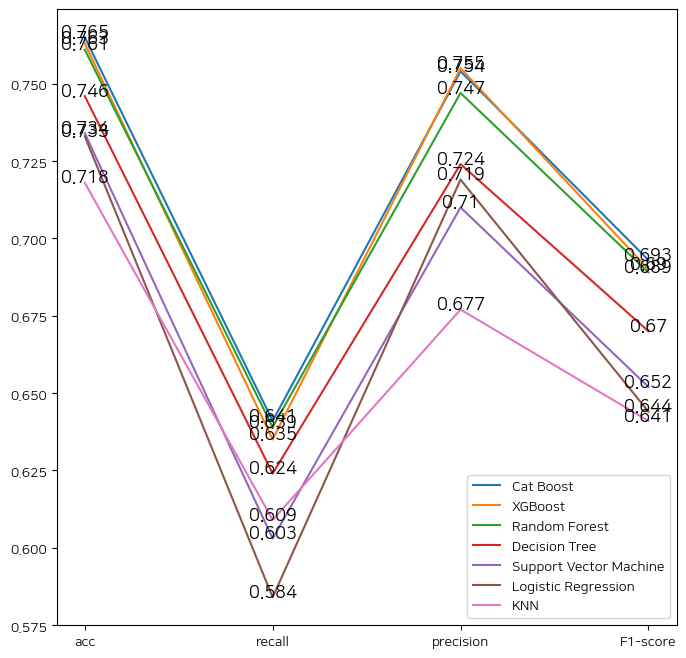

In [124]:
# 결과 예측하기
pred_cat = cat.predict(X_test)
result_view('Cat Boost',pred_cat,Y_test)

### **8) DNN(Deep Neural Network**

#### [Step 1. 라이브러리 불러오기]

In [125]:
# DNN 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import random

random.seed(10)
np.random.seed(10)
tf.random.set_seed(10)

#### [Step 2. 모델 생성하기]

In [126]:
x_train.shape, y_train.shape #features 개수 확인하기

((41250, 26), (41250,))

In [127]:
# 모델 구성하기
initializer = tf.keras.initializers.GlorotUniform(seed=10) #모델 시드 고정하기
dnn = Sequential()
dnn.add(Dense(8, activation='relu', input_shape=(26,),kernel_initializer=initializer))
dnn.add(Dropout(0.2))
dnn.add(Dense(2, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(Dense(1, activation='sigmoid'))

In [128]:
# 모델 확인하기
dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 216       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


In [129]:
# 모델 컴파일 – 이진 분류 모델
dnn.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

#### [Step 3. 모델 학습하기]

In [130]:
# Callback : 조기종료, 모델 저장하기
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [131]:
# val_loss 모니터링해서 성능이 5번 지나도록 좋아지지 않으면 조기 종료하기
early_stop = EarlyStopping(monitor='val_loss', mode='min', 
                           verbose=1, patience=5)

In [132]:
# val_loss 가장 낮은 값을 가질때마다 모델저장하기
check_point = ModelCheckpoint('best_model.h5', verbose=1, 
                              monitor='val_loss', mode='min', save_best_only=True)

In [133]:
# 모델 학습하기
history = dnn.fit(x=x_train, y=y_train, 
          epochs=50 , batch_size=20,
          validation_data=(x_val, y_val), verbose=1,
          callbacks=[early_stop, check_point])

Epoch 1/50
2038/2063 [============================>.] - ETA: 0s - loss: 0.6531 - accuracy: 0.6349
Epoch 1: val_loss improved from inf to 0.60126, saving model to best_model.h5
2063/2063 [==============================] - 4s 2ms/step - loss: 0.6528 - accuracy: 0.6353 - val_loss: 0.6013 - val_accuracy: 0.7125
Epoch 2/50
2026/2063 [============================>.] - ETA: 0s - loss: 0.6040 - accuracy: 0.6866
Epoch 2: val_loss improved from 0.60126 to 0.56892, saving model to best_model.h5
2063/2063 [==============================] - 4s 2ms/step - loss: 0.6043 - accuracy: 0.6863 - val_loss: 0.5689 - val_accuracy: 0.7241
Epoch 3/50
2050/2063 [============================>.] - ETA: 0s - loss: 0.5932 - accuracy: 0.6961
Epoch 3: val_loss improved from 0.56892 to 0.56519, saving model to best_model.h5
2063/2063 [==============================] - 4s 2ms/step - loss: 0.5933 - accuracy: 0.6961 - val_loss: 0.5652 - val_accuracy: 0.7201
Epoch 4/50
2054/2063 [============================>.] - ETA: 0s -

#### [Step 4. 결과 검증하기]

157/157 [==============================] - 0s 994us/step
                          acc  recall  precision  F1-score
Cat Boost               0.765   0.641      0.754     0.693
XGBoost                 0.763   0.635      0.755     0.690
Random Forest           0.761   0.639      0.747     0.689
Decision Tree           0.746   0.624      0.724     0.670
DNN                     0.738   0.538      0.759     0.630
Support Vector Machine  0.734   0.603      0.710     0.652
Logistic Regression     0.733   0.584      0.719     0.644
KNN                     0.718   0.609      0.677     0.641


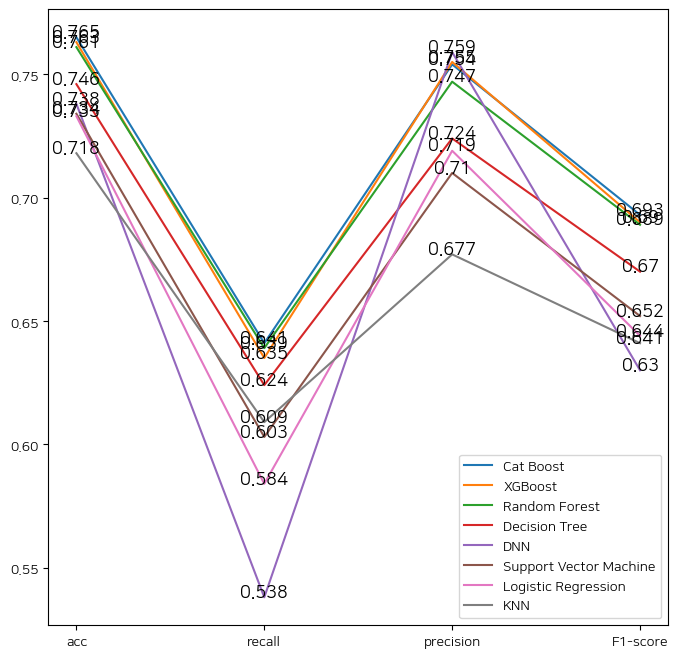

In [134]:
# 결과 예측하기
pred_dnn=(dnn.predict(X_test) > 0.5).astype("int32")
pred_dnn=pred_dnn.reshape(1,-1)[0]
result_view('DNN',pred_dnn,Y_test)

## 4. AI 모델의 평가하기

### 1) 혼동행렬

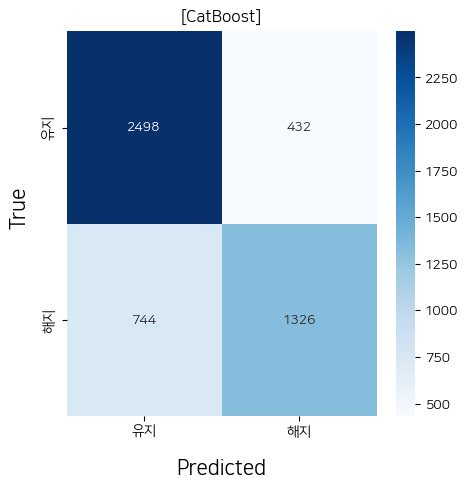

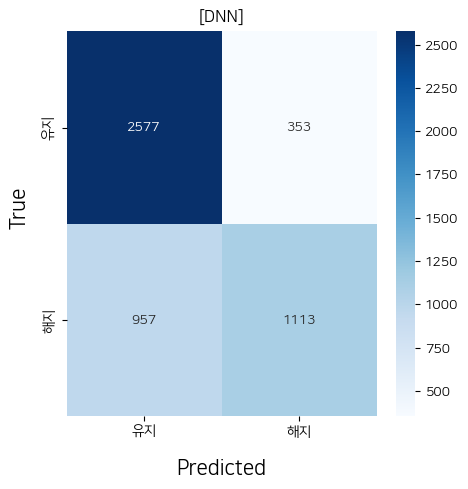

(None, None)

In [135]:
# confusion matrix를 그리기위한 함수를 정의하기
def show_confusion_matrix(labels,y_true,y_pred,title):   
    sns.heatmap(confusion_matrix(y_true,y_pred), annot=True, fmt='d',xticklabels=labels,yticklabels=labels,cmap=plt.cm.Blues,linecolor='black')
    plt.text(1,2.3,'Predicted',size=15,ha='center')
    plt.text(-0.3,1,'True',rotation=90,size=15,ha='center')
    plt.title(title)
    plt.show()
    
labels=['유지','해지']

# 정의된 함수를 활용하여 catboost와 DNN모델의 confusion matrix 그flrl
show_confusion_matrix(labels,Y_test,pred_cat,'[CatBoost]'), show_confusion_matrix(labels,Y_test,pred_dnn,'[DNN]')

### 2) ROC와 AUC

In [136]:
# 패키지 불러오기
from sklearn.metrics import roc_curve, auc

# Parameter
# y_pred: 원핫인코딩된 2차원 이상(class수에 따라)의 numpy.array
# y_true: 실제 값
# y_label: label 값(list)
# ROC를 그려주는 함수

def plot_multiclass_roc(y_pred, y_true, y_label):
    
    # 빈 ditionary 생성하기
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # roc_curve()의 입력값으로 y_true의 가변수 생성하기
    y_true_dummies = pd.get_dummies(y_true, drop_first=False).values
    for i in range(len(y_label)):
        fpr[i], tpr[i], _ = roc_curve(y_true_dummies[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # 각 클래스에 대한 ROC계산하기
    fig, ax = plt.subplots(figsize=(17,10))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(len(y_label)):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], y_label[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

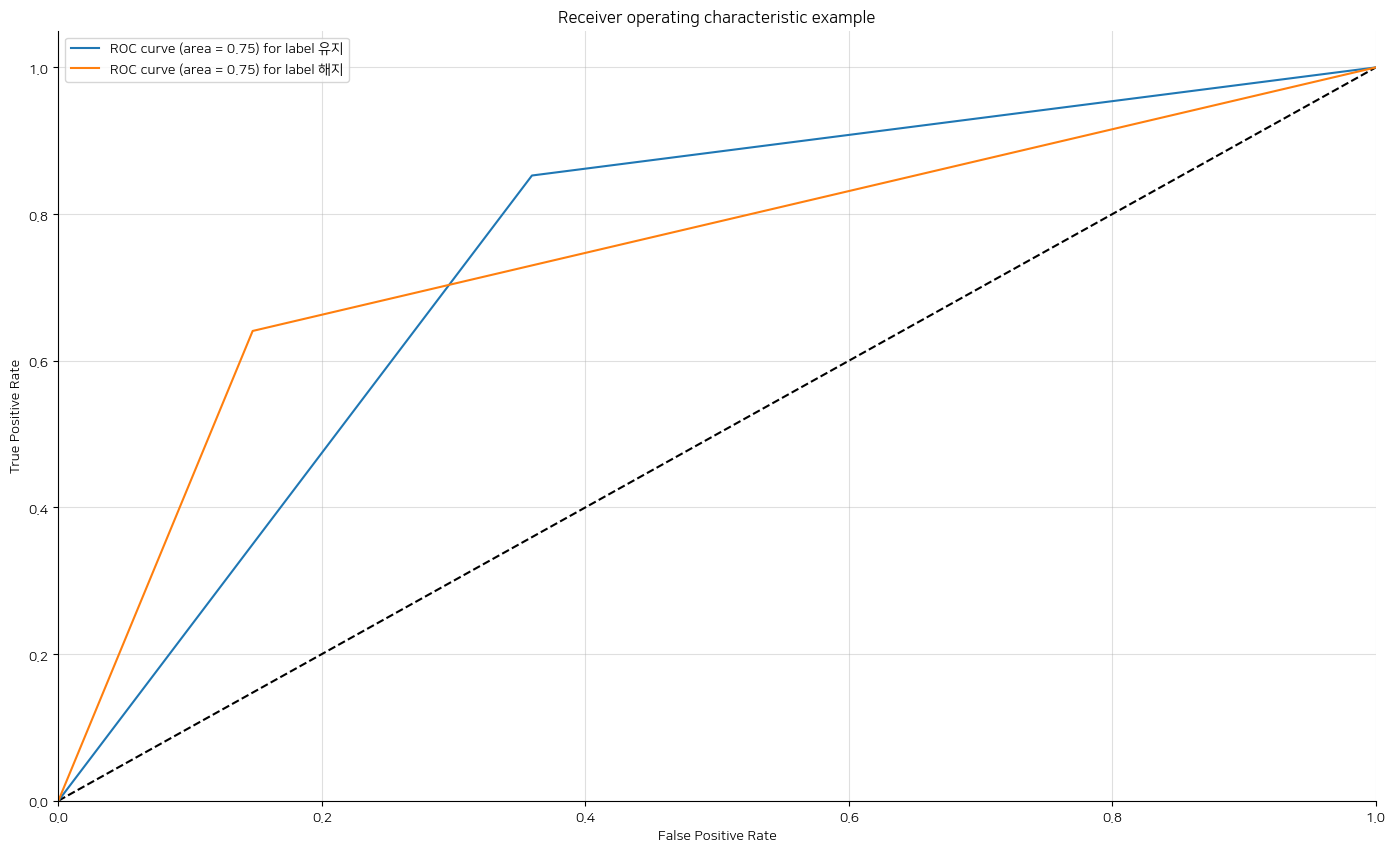

In [137]:
# labels 값은 Confusion Matrix에서 정한 값을 사용하기
plot_multiclass_roc(pd.get_dummies(pred_cat).to_numpy(), Y_test, labels)

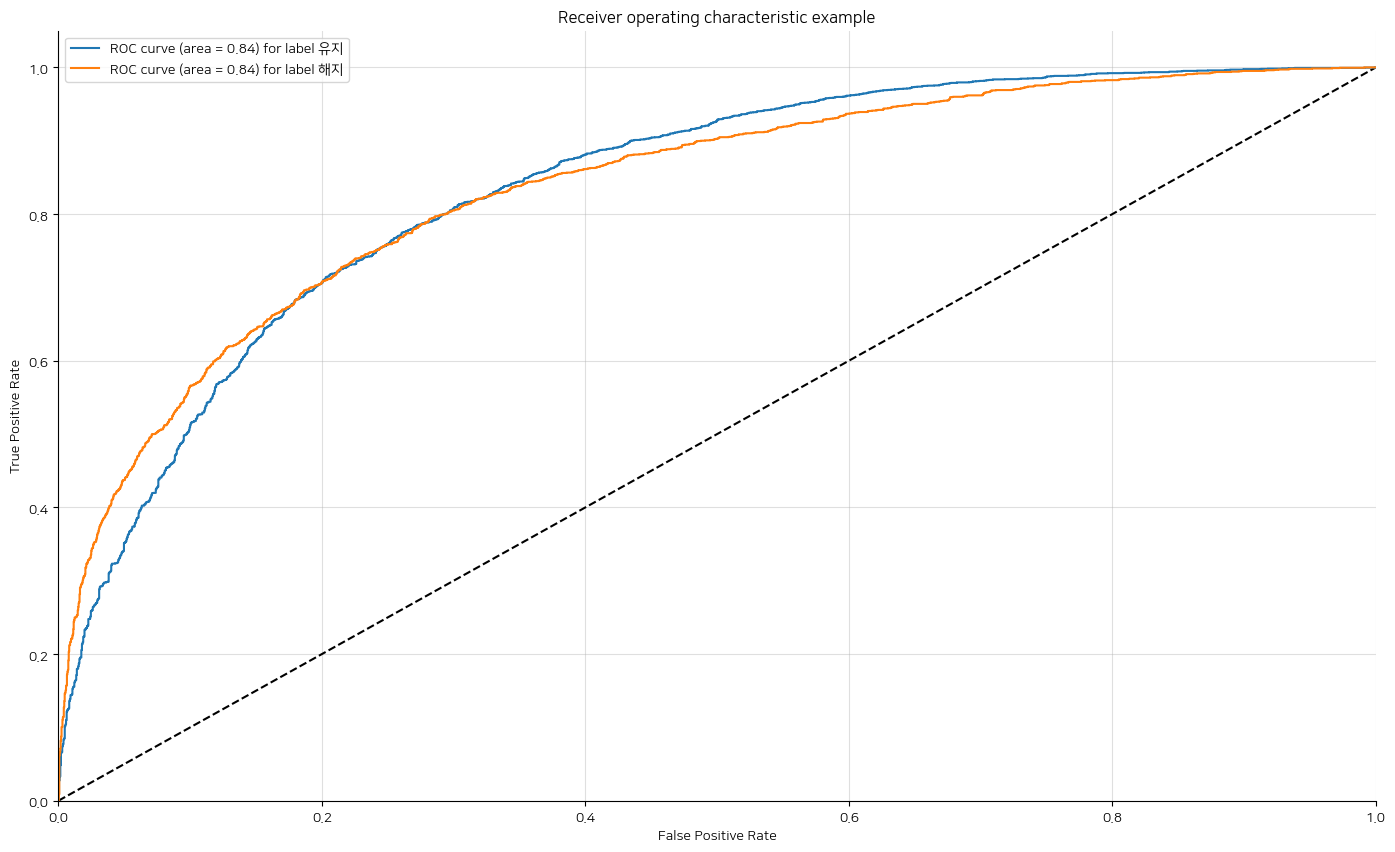

In [138]:
pred_cat_proba=cat.predict_proba(X_test)
plot_multiclass_roc(pred_cat_proba, Y_test, labels)